# EE6024 CA3: Zach Buckley - 118349121

# Load in libraries and data

In [1]:
# Import necessary libraries
import numpy as np  #Import the numpy library for numerical computing
import pandas as pd #Import the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt #Import matplotlib.pyplot for data visualization
from scipy.signal import periodogram #Import periodogram for frequency analysis

#Import libraries for the model we are using
from sklearn.ensemble import RandomForestClassifier #Import RandomForestClassifier to create our model
#Import evaluation metrics from sklearn.metrics for performance evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay,roc_curve, auc
# Import GridSearchCV and train_test_split functions in order to help choose model hyperparameters and split our data into training and test
from sklearn.model_selection import GridSearchCV,train_test_split 

import seaborn as sns #Import the seaborn library to aid data visualization

from imblearn.under_sampling import RandomUnderSampler #Import RandomUnderSampler to undersample the data

In [2]:
#Load in the training data from each csv file as data frame. This is done using the pandas library
eeg1_csv =   pd.read_csv('EEG1_processed.csv')
eeg4_csv =   pd.read_csv('EEG4_processed.csv')
eeg5_csv =   pd.read_csv('EEG5_processed.csv')
eeg7_csv =   pd.read_csv('EEG7_processed.csv')
eeg9_csv =   pd.read_csv('EEG9_processed.csv')
eeg13_csv =   pd.read_csv('EEG13_processed.csv')
eeg14_csv =   pd.read_csv('EEG14_processed.csv')
eeg19_csv =   pd.read_csv('EEG19_processed.csv')
eeg21_csv =   pd.read_csv('EEG21_processed.csv')
eeg31_csv =   pd.read_csv('EEG31_processed.csv')
eeg34_csv =   pd.read_csv('EEG34_processed.csv')
eeg36_csv =   pd.read_csv('EEG36_processed.csv')
eeg38_csv =   pd.read_csv('EEG38_processed.csv')
eeg39_csv =   pd.read_csv('EEG39_processed.csv')
eeg44_csv =   pd.read_csv('EEG44_processed.csv')
eeg47_csv =   pd.read_csv('EEG47_processed.csv')
eeg51_csv =   pd.read_csv('EEG51_processed.csv')

In [3]:
#Load in the test label data for each csv file as a data frome using pandas.
#The drop function is used to remove the unnamed column at the start of each file.
channelAnno_1_csv = pd.read_csv('eeg1_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_4_csv = pd.read_csv('eeg4_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_5_csv = pd.read_csv('eeg5_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_7_csv = pd.read_csv('eeg7_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_9_csv = pd.read_csv('eeg9_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_13_csv = pd.read_csv('eeg13_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_14_csv = pd.read_csv('eeg14_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_19_csv = pd.read_csv('eeg19_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_21_csv = pd.read_csv('eeg21_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_31_csv = pd.read_csv('eeg31_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_34_csv = pd.read_csv('eeg34_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_36_csv = pd.read_csv('eeg36_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_38_csv = pd.read_csv('eeg38_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_39_csv = pd.read_csv('eeg39_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_44_csv = pd.read_csv('eeg44_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_47_csv = pd.read_csv('eeg47_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_51_csv = pd.read_csv('eeg51_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)

In [4]:
#Define function to plot the eeg data with the seizure labels
def plot2(eeg,channelAnno, eegchannel,sfreq, starttime, endtime):

    #Parameters:
    #eeg - the EEG data.
    #channelAnno - the labeled data.
    #eegchannel - the channel of EEG you wish to plot.
    #sfreq - the sampling frequency.
    #starttime - time in seconds of the start time of the EEG data that you wish to plot.
    #endtime - time in seconds of the end time of the EEG data that you wish to plot.

    leneeg = len(eeg) #Length of eeg file
    eegst=int(sfreq*starttime) #Calculate the start eeg index
    eeget=int(sfreq*endtime) #Calculate the end eeg index
    #eegtime is the numpy array created that converts the EEG index to seconds, based on the sampling frequency
    eegtime= np.arange(0,leneeg,1)/sfreq 
    fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16,5)) #Set the number of rows and columns to 1 and set the figure size
    eeg_trace = ax.plot(eegtime[eegst:eeget+1], eeg.loc[eegst:eeget,eegchannel],color='blue',label='EEG') # Plot EEG Data
    ax.set_ylabel('$\mu V$',color='blue',fontsize=16) # Set left hand yaxis label to 'Cases'.
    ax.set_xlabel('Seconds',color='green',fontsize=16) # Set left hand yaxis label to 'Cases'.
    ax2 = ax.twinx() # Create a second y axis on the right hand side of the plot using the same x axis.
    annotations = ax2.plot(channelAnno.loc[starttime:endtime,eegchannel],color='red',label='Seizure') # Plot Annotation data.
    ax2.set_ylabel('Seizure',color='red',fontsize=16) # Set right hand yaxis label to 'Deaths'.
    ax2.set_ylim(bottom=0) # Limit the right-hand y axis to start at 0.
    ax2.grid() # Plot a grid for the right hand y axis.
    #Add a legend to show the channel used and the seizure graph
    ax2.legend(eeg_trace + annotations, [eegchannel,'Seizure'], fontsize=16, loc='best') 
    #Add a title to the graph
    ax.set_title('EEG and Anotation',fontsize=16) 
    plt.show()# Show the plot

# 1. Summary (a)

This report aims to develop a classifier for neonatal seizures using EEG recordings. The dataset for this report contains 17 seperate EEG recordings, each with 8 channels. Annotations of seizure and non-seizure segments were provided for this. Also a test dataset and corresponding annotations was given for a single channel, Cz-C3. 

The ANSeR algorith which uses a Support Vector Machine, 8 channels and 55 features, was used as the basis for this report's model. However, there are several differences between ANSeR and the model created in this report. Firstly, a random forest model was used to created this classifier as opposed to an SVM. Also, only 13 features for a single channel was used for this model.

In order to create the model, first the data was loaded in and some exploratory analysis was performed. Then, each dataset was combined into a single dataframe. After this, functions were created to extract 25 features from the data. These features were calculated for the Cz-C3 channel as this was the only channel provided in the test data. Each of these feature arrays were combined into a feature matrix. The data was then split into training and validation data. Undersampling was then performed, to address the imbalanced dataset. This ensured that there were an equal number of samples with the seizure label and non-seizure label. 

A grid search using cross validation was then performed on the data in order to find the optimal hyperparamters for the model. A random forest model was then created using these optimal values. This model was evaluated using the validation data and the most important features were determined based in the Gini Index. These features were Line Length, Non Linear Energy, Activity, RMSA,Total Power, Power in band 10-12, Power in band 7-9, Power in band 9-11, Power in band 11-13, Power in band 8-10, Intensity Weighted Mean Frequency,Mobility and Spectral Edge Frequency 90.

Another model was then created using the 13 most important features to try to simplify the model and avoid overfitting. Once again, a grid search was used to determine the optimal hyperparameters and a random forest model was created with the optimal hyperparameters. This model was evaluated on the validation data and was deemed appropriate.

The test data was then loaded in and its features were calculated. The 13 important features were combined to create a test data set and used to evaluate the final model. A confusion matrix and ROC curve were created. The metrics were as follows: 
* **Accuracy:** 0.8311
* **Sensitivity:** 0.7636
* **Specificity:** 0.8351
* **Precision:** 0.2154
* **F1 score:** 0.3360
* **Area under ROC:** 0.88 

These scores indicate that the model perfroms reasonably well with relatively high scores for accuracy, sensitivity, specificity and area under ROC indicating the model has as decent true probability rate and true negative rate. The low precision and F1 score indicate that the models postive predictions are often incorrect.

# 2. Exploratory Analysis and Data Preprocessing

## 2.1. Justification for using Cz-C3 channel only (f)
Since the test data provided only includes data from the "Cz-C3" channel, the analysis in this report was conducted solely on this channel. Although having access to all channels would have allowed for the creation of a multi-channel ensemble model, it would not have been useful for predicting the test data which only has one channel, Cz-C3. 

This approach was also taken because other channels may have different distinct seizure patterns, requiring different variables for analysis. Combining the data from these additional channels could potentially decrease the predictive accuracy of the model for the Cz-C3 channel.

Moreover, since the other channels were obtained from the same individuals within the same timeframe, they may provide similar insight, potentially rendering their inclusion unnecessary. Analyzing these additional channels would only increase the computational time required without adding significant improvement to the predictions.

## 2.2. Plot Data

Lists of the eeg dataframes and the annotation dataframes were created to simplify code.

In [5]:
#Define a list of the eeg dataframes
dataframes = [eeg1_csv, eeg4_csv, eeg5_csv, eeg7_csv, eeg9_csv, eeg13_csv, eeg14_csv, eeg19_csv, 
              eeg21_csv, eeg31_csv, eeg34_csv, eeg36_csv, eeg38_csv, eeg39_csv, eeg44_csv, 
              eeg47_csv, eeg51_csv]

#Define a list of the channel annotation dataframes
dataframes_labels=[channelAnno_1_csv, channelAnno_4_csv, channelAnno_5_csv, channelAnno_7_csv, channelAnno_9_csv, 
                    channelAnno_13_csv, channelAnno_14_csv, channelAnno_19_csv, channelAnno_21_csv, channelAnno_31_csv, 
                    channelAnno_34_csv, channelAnno_36_csv, channelAnno_38_csv, channelAnno_39_csv, channelAnno_44_csv, 
                    channelAnno_47_csv, channelAnno_51_csv]

The Cz-C3 channel plots for each of the dataframes was then plotten along with the corresponding annotations.

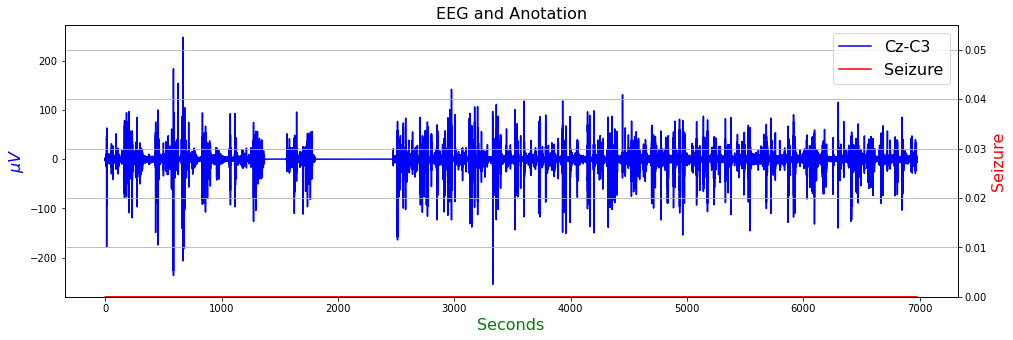

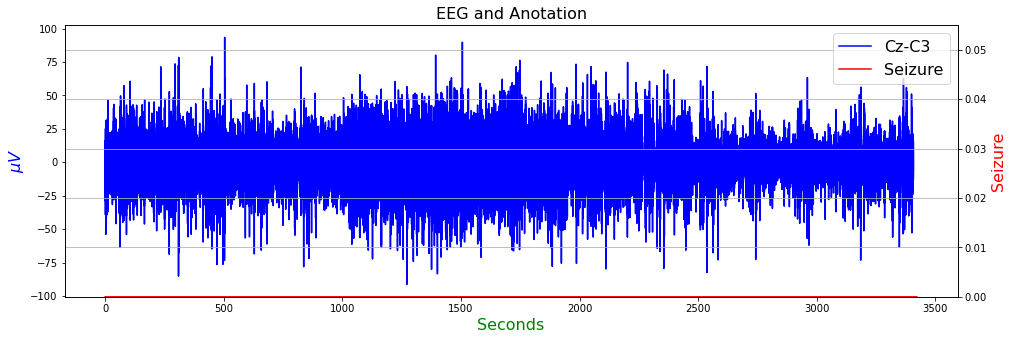

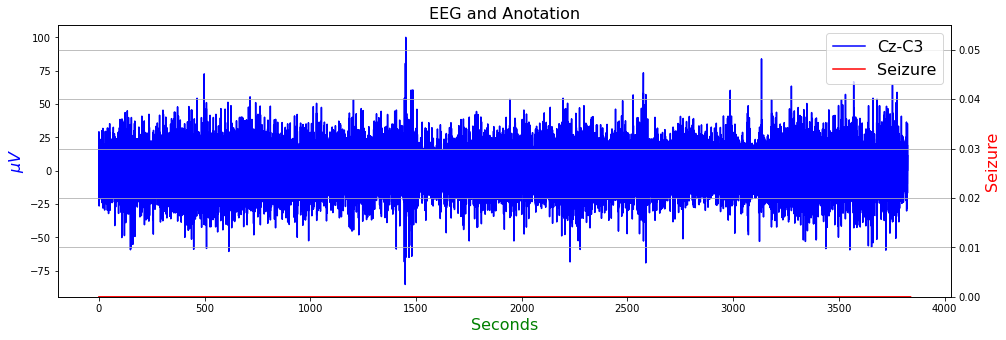

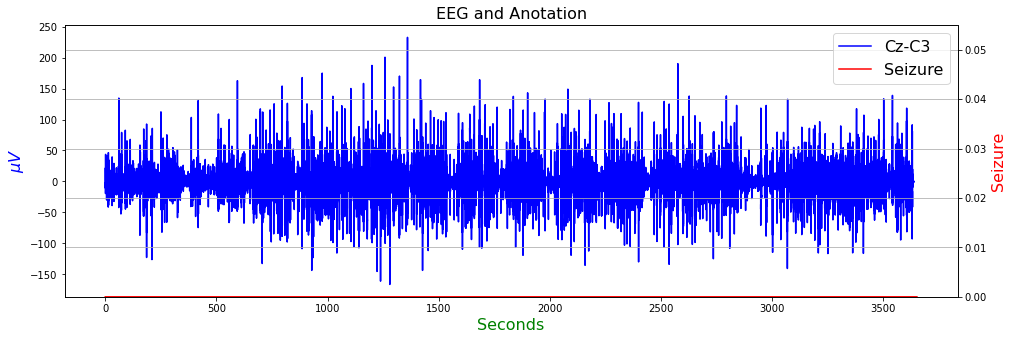

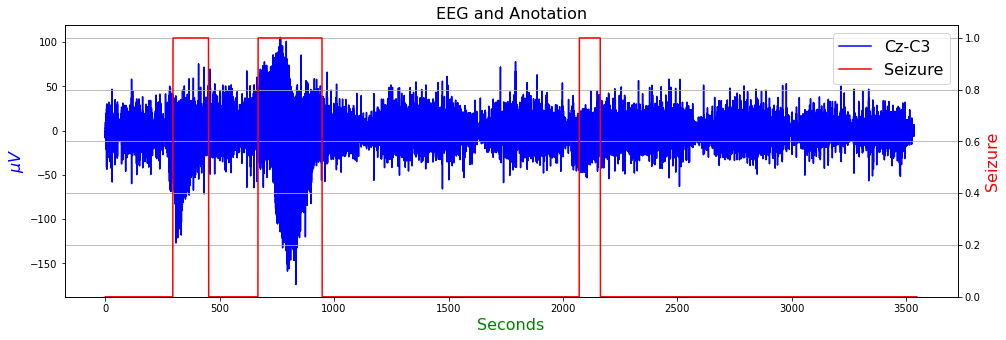

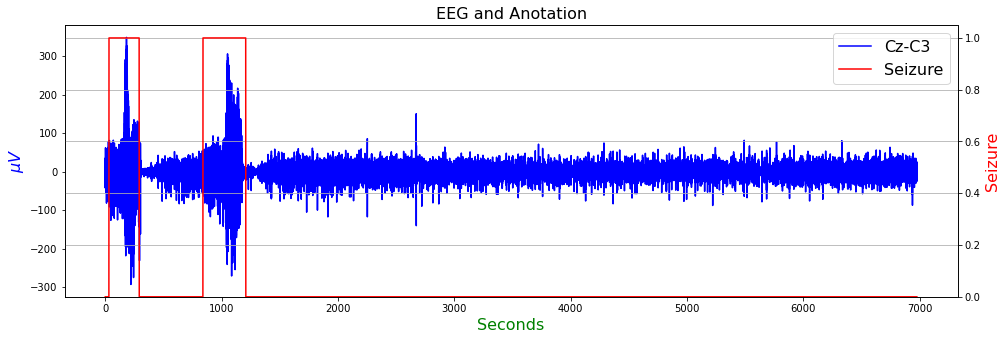

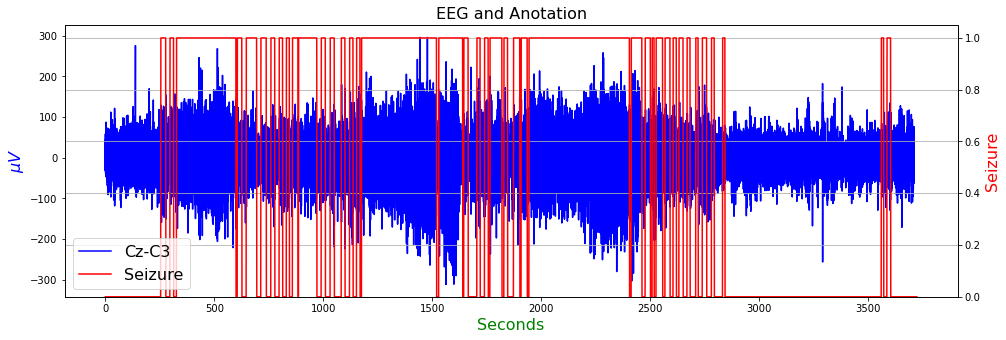

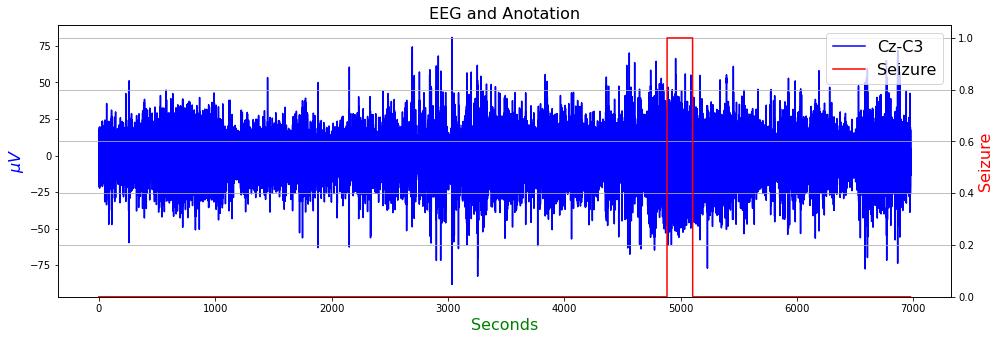

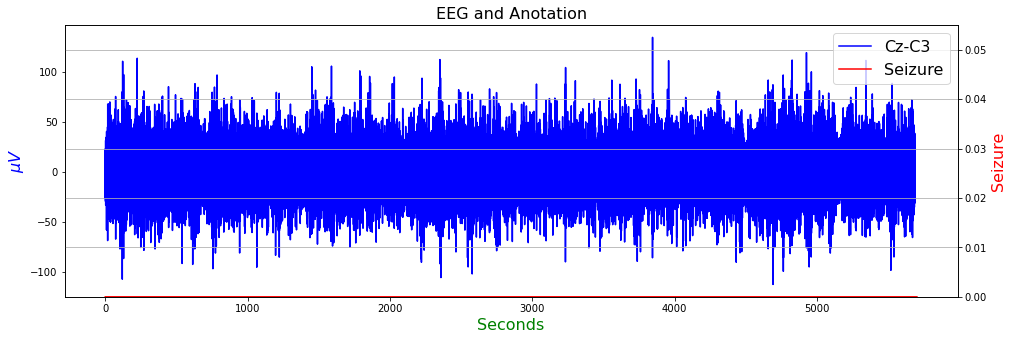

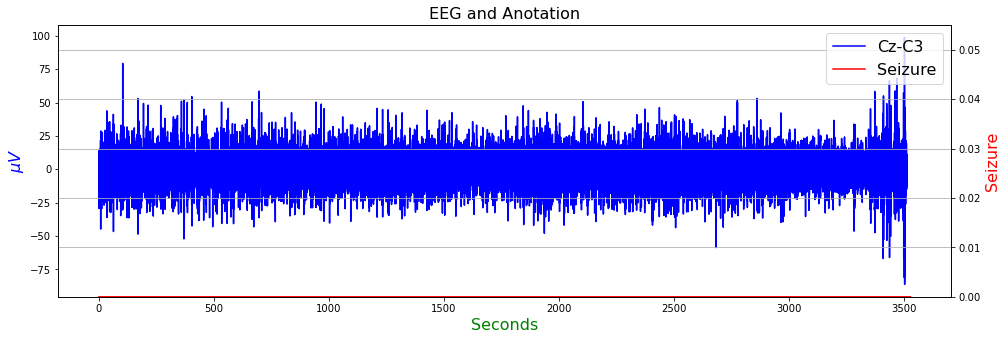

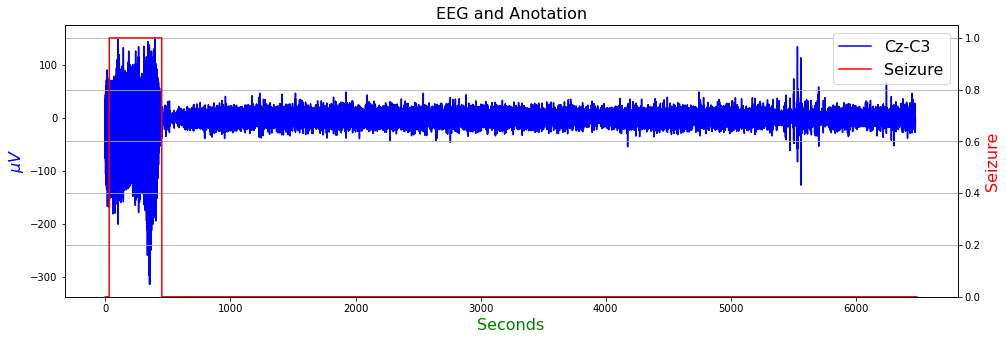

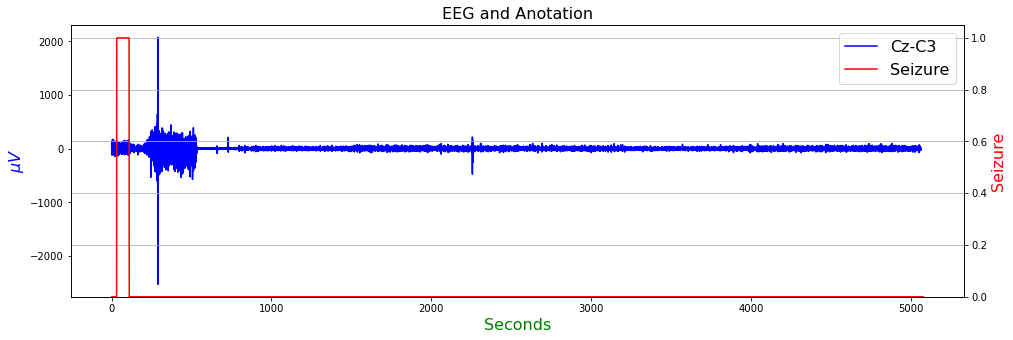

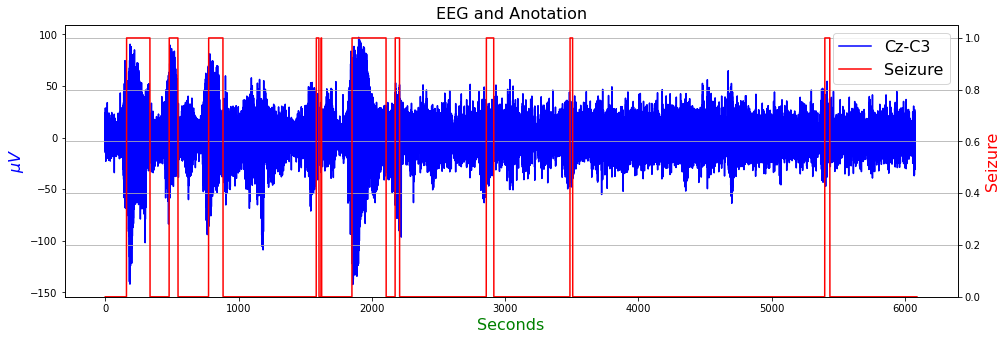

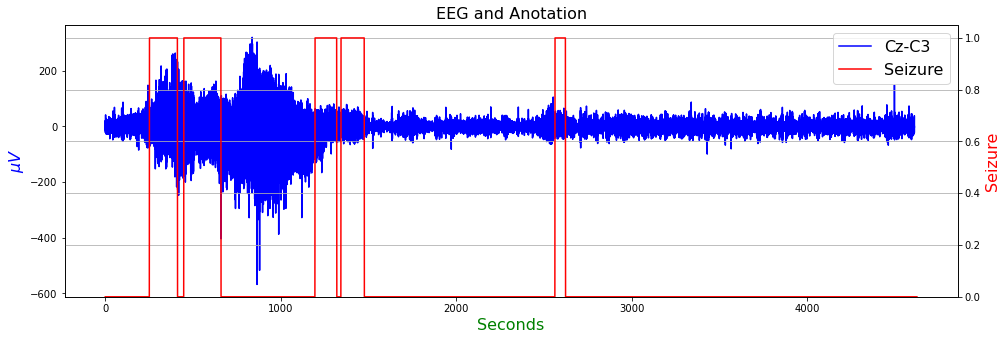

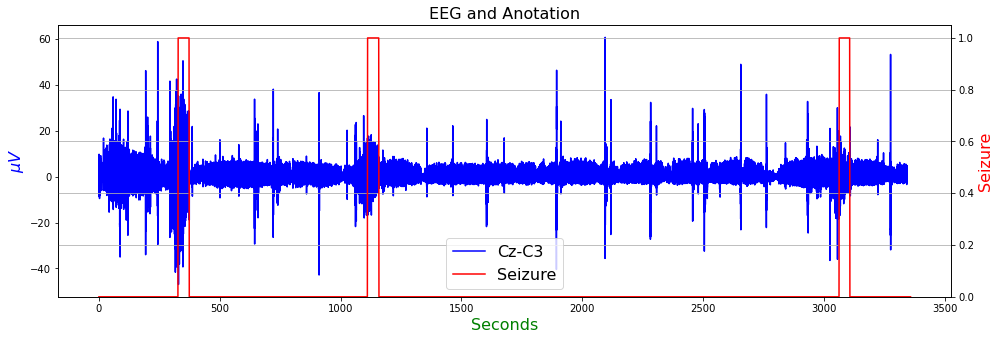

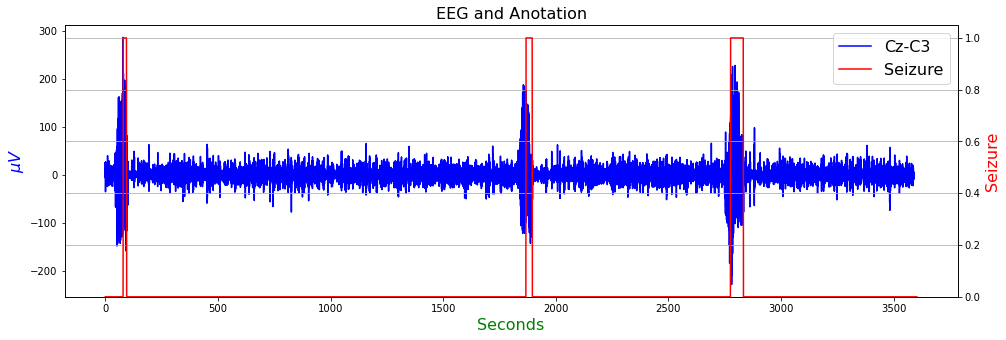

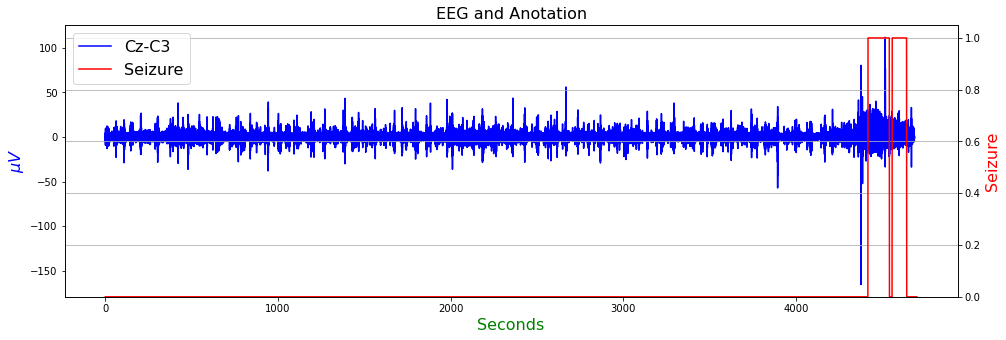

In [6]:
#Iterate through each of the eeg dataframes and their associated labels simultaneously using the zip function
for df,dfl in zip(dataframes,dataframes_labels):
    #Use the plot2 function to plot each of these eeg graphs along with the labels for the Cz-C3 channel
    #The frequency is 32, the start time is 0 and the end time is the length of the dataset divided by 32
    plot2(df,dfl,'Cz-C3',32, 0, len(eeg1_csv)/32) 


From these plots it can be seen that seizures often correspond to spikes in the eeg data showing the potential for a classification model.

## 2.3. Justification for exclusion of eeg1 data (f)
From these plots it can be seen that the eeg1 data has many zero values. This is likely due to an error in the collection of the data such as a disconnected sensor. 

To address this issue, this data was removed from the dataset, rather than being imputed. Since this section of the data does not include any seizures, it was excluded for convenience. As the dataset is imbalanced, with relatively little seizure data in comparison to non-seizure data, additional non-seizure data was not deemed necessary.

## 2.4. Creation of combined dataframe
Each of the eeg and annotation dataframes were then concatenated into a single dataframe.

In [7]:
#The list of dataframes was redefined without the eeg1 data
dataframes = [eeg4_csv, eeg5_csv, eeg7_csv, eeg9_csv, eeg13_csv, eeg14_csv, eeg19_csv, 
              eeg21_csv, eeg31_csv, eeg34_csv, eeg36_csv, eeg38_csv, eeg39_csv, eeg44_csv, 
              eeg47_csv, eeg51_csv]

#The list of channel annotations was redefined without the eeg1 channel annotation data
dataframes_labels=[channelAnno_4_csv, channelAnno_5_csv, channelAnno_7_csv, channelAnno_9_csv, 
                    channelAnno_13_csv, channelAnno_14_csv, channelAnno_19_csv, channelAnno_21_csv, channelAnno_31_csv, 
                    channelAnno_34_csv, channelAnno_36_csv, channelAnno_38_csv, channelAnno_39_csv, channelAnno_44_csv, 
                    channelAnno_47_csv, channelAnno_51_csv]

In [8]:
#The concat function was used to combine each of the dataframes based on their columns
#This was done by iterating through each dataframe using a for loop
#The ignore index parameter ensures that the index does not reset for each dataframe added
eeg_df = pd.concat([df for df in dataframes], ignore_index=True)
#Similarly the concat function was used to combine each of the dataframe of labels based on their columns
#Once again, this was done by iterating through each dataframe of labels using a for loop
#The ignore index parameter ensures that the index does not reset for each dataframe of labels added
eeg_labels = pd.concat([dfl for dfl in dataframes_labels], ignore_index=True)

The dataframe was checked for 0 values after eeg1 was removed. There were none remaining indicating the rest of the data has been collected correctly.

In [98]:
#The combined dataframe, eeg_ef, was checked for any more 0 values using the loc and len functions.
len(eeg_df.loc[(eeg_df==0).any(axis=1)])

0

##  2.5. Description and justification of epoch creation (b)

Next the epoch length was chosen. A length of 256 data point was used, which at 32Hz corresponds to 8s. A 50% overlap between consecutive epochs was also used. According to Temko et al (2011) which cites De Weerd et al (1999), 10s is the minimum duration of a seizure given the background EEG is abnormal (which it is in this case). Having an 8s epoch will ensure any seizure can be captured in at least one epoch while shorter seizure-like events will will be ignored. The 4s overlap means that there is very little chance that a seizure will be missed.

In [10]:
NEpoch = 256 #Set the epoch length 256
Noverlap=128 #Set the overlap between epochs to 128
#Find the number of epochs in the dataset using the formula below
numberofEpochs = (len(eeg_df)-NEpoch)//(NEpoch-Noverlap) + 1 # Use integer divison // to get exact number of epochs
numberofEpochs #Print the number of epochs

21387

There are 21,387 epochs in the dataset.

The mid-interval time at which each of the epochs occur was then calculated using the fact that a new epoch occurs every 4 seconds.

In [11]:
#Define the featuretime. This is the times at which each of the epochs occur in seconds
#Use the arange function to create a list of values from 1 up to the number of epochs. Multiply each value by 4
featuretime= np.arange(1,numberofEpochs+1,1)*4 

This was then used to find the corresponding seizure annotaion values for each epoch.

In [12]:
#Find the corresponding seizure labels for the features. The loc function is used to extract just the Cz-C3 channel column.
#Just take the values at the featuretime indexes so it matches with the defined epoch times
#Convert this to a numpy array using the to_numpy function
CzC3_labels = eeg_labels.loc[:,'Cz-C3'][featuretime].to_numpy()

The length of the annotaions array now matches up with the number of epochs

In [13]:
#Check the length of the labels array
len(CzC3_labels) 

21387

# 3. Creation of Features

## 3.1. Time Domain Features
Next, functions for the time domain features were created as described in to slides provided. These were applied to each epoch of the data. A plot was also created to plot the feature with the egg data and the feature with the seizure annotations. This plot can be used to identify potential relationships between that feature and the seizures.

### 1. Line Length

\begin{equation}
L = \sum\limits_{i=0}^{N-2} |x(i+1) - x(i)|
\end{equation}



* $L$ is the line length
* $N$ is the number of points
* $x_i$ represents the $i$th point in the x-axis

In [14]:
#Define a function to calculate line length that takes N (the number of values in an epoch) 
#and epoch (an array containing the epoch values) as inputs
def LLcalculation(N, epoch):
    #Find the sum of the difference between consecutive epochs to find the line lenfth
    LL = sum(np.absolute(epoch[i+1]-epoch[i]) for i in range(N-1))
    return LL #Return the line length value

In [15]:
epochstart=0 #Set epochstart to 0
LL_Feature = np.array([]) #Define an array to hold the line length values
for i in range(numberofEpochs): #Iterate through a for loop for each epoch
    #Find the eeg values in the Cz-C3 channel in the current epoch using loc. Convert this to a numpy array using to_numpy()
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"Cz-C3"].to_numpy() 
    epochstart += Noverlap #Add Noverlap (128) to the epochstart value
    #Find the line length value for the current epoch using the LLcalculation function
    #Append this value to the LL_Feature array using the append function
    LL_Feature=np.append(LL_Feature,LLcalculation(NEpoch, Epoch))

In [16]:
len(LL_Feature) #Check the length of this feature

21387

In [17]:
#Define a function, plot3 to plot the selected feature wth the eeg data values, 
#then plot the selected feature with the eeg annotations
def plot3(eeg_data, eeg_labels, feature,feature_time, feature_name):
    
    #Parameters:
    #eeg_data - the eeg data
    #eeg_labels - the eeg labels
    #feature - the feature data array
    #feature_time - the time at which each of the epochs occur
    #feature_name - the name of the feature to plot
    
    fig,ax = plt.subplots(nrows = 2, ncols = 1, figsize=(16,10)) #Create a figure with two plots
    recordingtime= np.arange(0,len(eeg_data),1)/32  #Define the recording time
    eeg_trace = ax[0].plot(recordingtime, eeg_data,color='blue') # Plot EEG Data
    ax[0].set_ylabel('$\mu V$',color='blue',fontsize=16)  #Set the y label for the first plot
    ax[0].set_xlabel('Seconds',color='green',fontsize=16)  #Set the x label for the first plot
    ax2 = ax[0].twinx() # Create a second y axis on the right hand side of the plot using the same x axis.
    features = ax2.plot(feature_time, feature,color='red',label=feature_name) # Plot Annotation data.
    ax2.set_ylabel(feature_name, fontsize=16, color='red') #Set the y label for the second axis
    ax2.set_ylim(bottom=0) # Limit the right-hand y axis to start at 0.
    ax2.grid() # Plot a grid for the right hand y axis.
    ax2.legend(eeg_trace + features, ['eeg',feature_name], fontsize=16, loc='best') #Add a legend with eeg and the feature name
    ax[0].set_title('EEG and '+feature_name,fontsize=16) #Add a title to the plot

    annotations = ax[1].plot(eeg_labels,color='blue',label='Seizure') # Plot EEG Data
    ax[1].set_ylabel('Seizure',color='blue',fontsize=16) #Set the y label for the second plot
    ax[1].set_xlabel('Seconds',color='green',fontsize=16) #Set the x label for the second plot
    ax2 = ax[1].twinx() # Create a second y axis on the right hand side of the plot using the same x axis.
    features = ax2.plot(feature_time, feature,color='red',label=feature_name) # Plot Annotation data.
    ax2.set_ylabel(feature_name, fontsize=16, color='red') #Set the y label for the second axis
    ax2.set_ylim(bottom=0) # Limit the right-hand y axis to start at 0.
    ax2.grid() # Plot a grid for the right hand y axis.
    #Add a legend with seizure and the feature name
    ax2.legend(annotations + features, ['Seizure',feature_name], fontsize=16, loc='lower center') 

    plt.show()#Show the plot

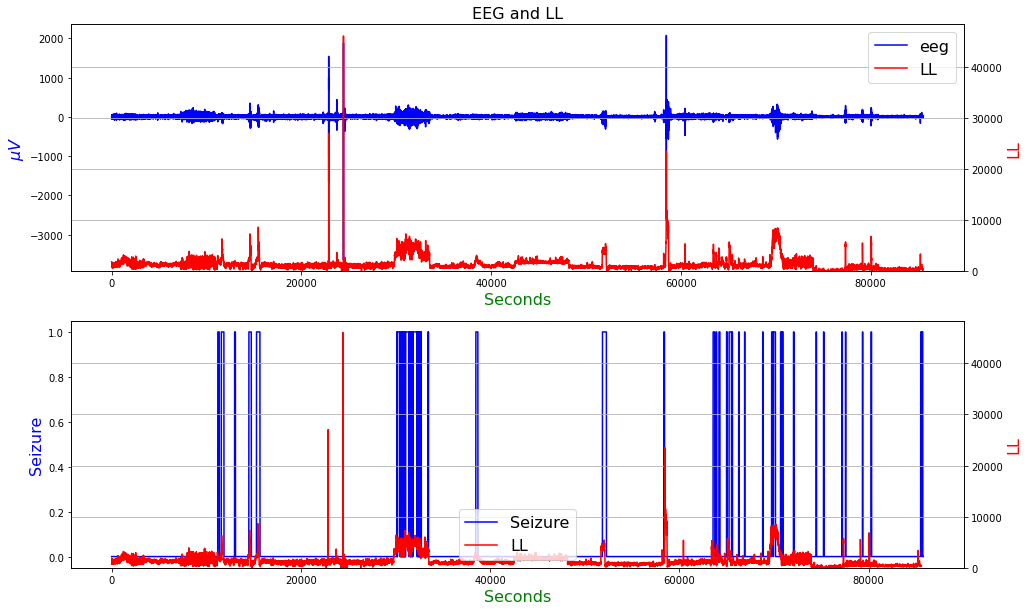

In [18]:
#Plot the linelength using the plot3 function
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], LL_Feature,featuretime, "LL")

As we can see there appears to be a relationship between line length and the seizure values. In general, the linelength appears to spike when there is a seizure occuring.

### 2. Root Mean Squared Amplitude
\begin{equation}
A = \sqrt{\frac{1}{N} \sum_{i=0}^{N-1} x^2(k)}
\end{equation}

where:

* $A$ is the RMS amplitude
* $N$ is the total number of samples
* $x(k)$ is the amplitude of the signal at time instant $k$

In [19]:
#Define a function to calculate RMSA that takes N (the number of values in an epoch) 
#and epoch (an array containing the epoch values) as inputs
def RMSAcalculation(N, epoch):
    #Calcukate the RMSA for the epoch values
    RMSA = np.sqrt((1/N)*sum((epoch[i])**2 for i in range(N)))
    return RMSA #Return the RMSA value

In [20]:
epochstart=0 #Set epochstart to 0
RMSA_Feature = np.array([]) #Define an array to hold the feature values
for i in range(numberofEpochs): #Iterate through a for loop for each epoch
    #Find the eeg values in the Cz-C3 channel in the current epoch using loc. Convert this to a numpy array using to_numpy()
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    epochstart += Noverlap #Add Noverlap (128) to the epochstart value
    #Find the feature value for the current epoch using the function define above
    #Append this value to the array using the append function
    RMSA_Feature=np.append(RMSA_Feature,RMSAcalculation(NEpoch, Epoch))

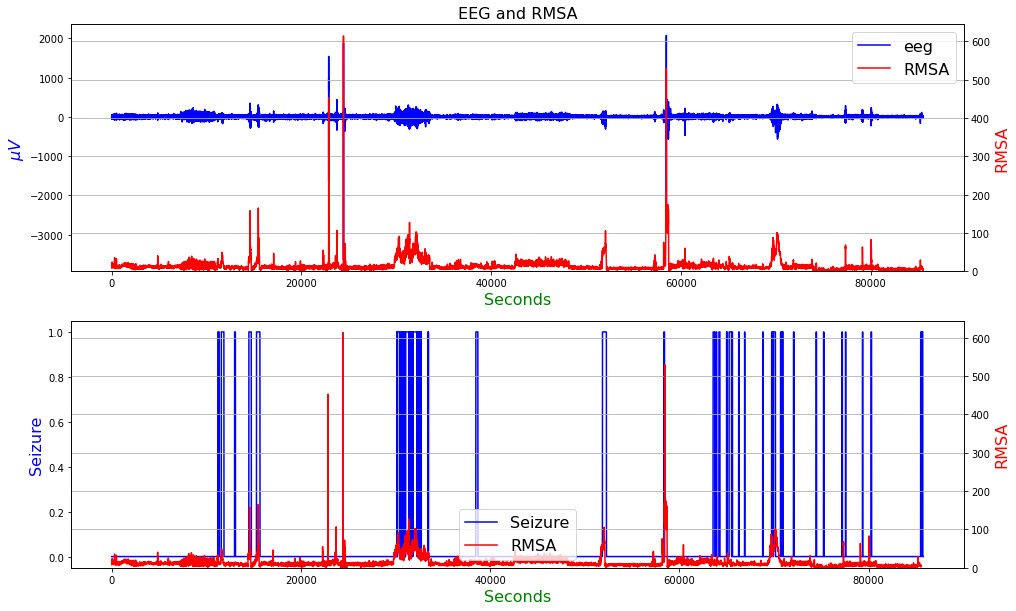

In [21]:
#Plot the this feature using the plot3 function
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], RMSA_Feature,featuretime, "RMSA")

This plot also appears to show a relationship between RMSA and the seizures.

### 3. Non Linear Energy

\begin{equation}
NLE = \frac{1}{N-2}\sum_{k=1}^{N-2} x(k)x(k+1)x(k+2)
\end{equation}

where:

* $NLE$ is the Non-Linear Energy of the signal
* $N$ is the total number of samples
* $x(k)$ represents the amplitude of the signal at time instant $k$

In [22]:
#Define a function to calculate NLE that takes N (the number of values in an epoch) 
#and epoch (an array containing the epoch values) as inputs
def NLEcalculation(N, epoch):
    #Calculate the NLE for the epoch values using the given formula
    NLE = (1/(N-2))*sum(((epoch[i+1])**2 - epoch[i]*epoch[i+2]) for i in range(N-2))
    return NLE #Return the NLE

In [23]:
epochstart=0 #Set epochstart to 0
NLE_Feature = np.array([]) #Define an array to hold the feature values
for i in range(numberofEpochs):#Iterate through a for loop for each epoch
    #Find the eeg values in the Cz-C3 channel in the current epoch using loc. Convert this to a numpy array using to_numpy()
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    epochstart += Noverlap #Add Noverlap (128) to the epochstart value
    #Find the feature value for the current epoch using the function define above
    #Append this value to the array using the append function
    NLE_Feature=np.append(NLE_Feature,NLEcalculation(NEpoch, Epoch))

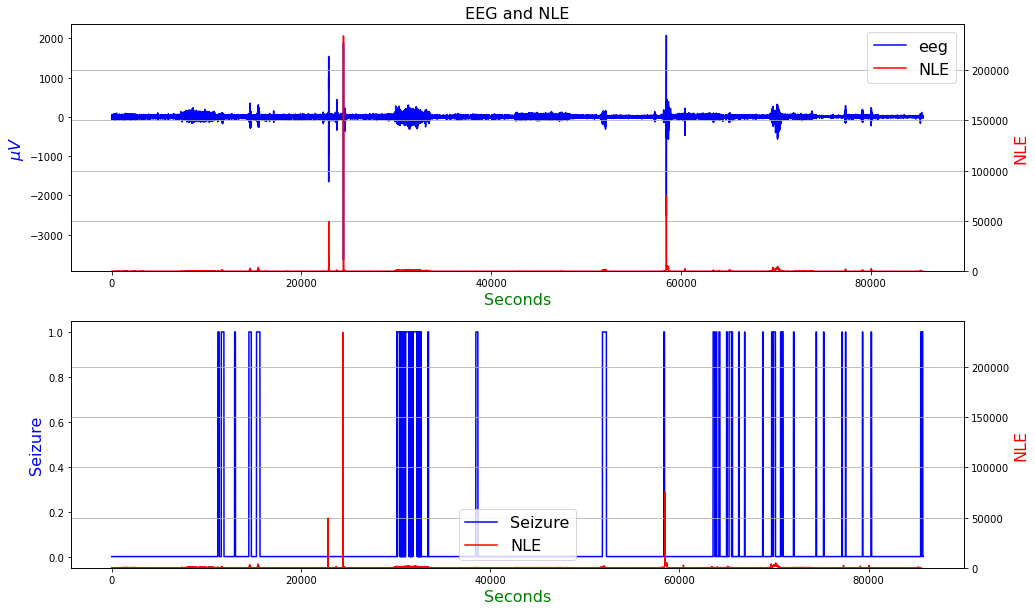

In [24]:
#Plot the this feature using the plot3 function
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], NLE_Feature,featuretime, "NLE")

It is harder to see the relationship in this plot due to several outliers skewing the scale. That being said there does appear to be a slight increase in NLE when a seizure is occuring.

### 4. 1st Hjorth Parameter: Activity
\begin{equation}
\mu = \frac{1}{N}\sum_{k=0}^{N-1} x(k)$
\end{equation}


\begin{equation}
activity = \sigma^2_x = \frac{1}{N}\sum_{k=0}^{N-1} (x(k) - \mu)^2
\end{equation}

where:

* $\sigma^2_x$ is the variance of the signal within the epoch
* $N$ is the number of samples in the epoch
* $x(k)$ is the amplitude of the signal at time instant $k$, and
* $\mu$ is the mean of the epoch


In [25]:
#Define a function to calculate the mean of an epoch that takes N (the number of values in an epoch) 
#and epoch (an array containing the epoch values) as inputs
def Meancalculation(N, epoch):
    #Calculate the mean
    Mean = (1/N)*sum((epoch[i]) for i in range(N))
    return Mean #Return the mean

In [26]:
#Define a function to calculate Activity that takes N (the number of values in an epoch) 
#and epoch (an array containing the epoch values) as inputs
def Activitycalculation(N, epoch):
    #Use the above function to get the mean value
    Mean = Meancalculation(N, epoch)
    #Calculate the activity using the given formula
    Activity = (1/N)*(sum(((epoch[i] - Mean)**2) for i in range(N)))
    return Activity #Return this value

In [27]:
epochstart=0 #Set epochstart to 0
Activity_Feature = np.array([]) #Define an array to hold the feature values
for i in range(numberofEpochs): #Iterate through a for loop for each epoch
    #Find the eeg values in the Cz-C3 channel in the current epoch using loc. Convert this to a numpy array using to_numpy()
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    epochstart += Noverlap #Add Noverlap (128) to the epochstart value
    #Find the feature value for the current epoch using the function define above
    #Append this value to the array using the append function
    Activity_Feature=np.append(Activity_Feature,Activitycalculation(NEpoch, Epoch))

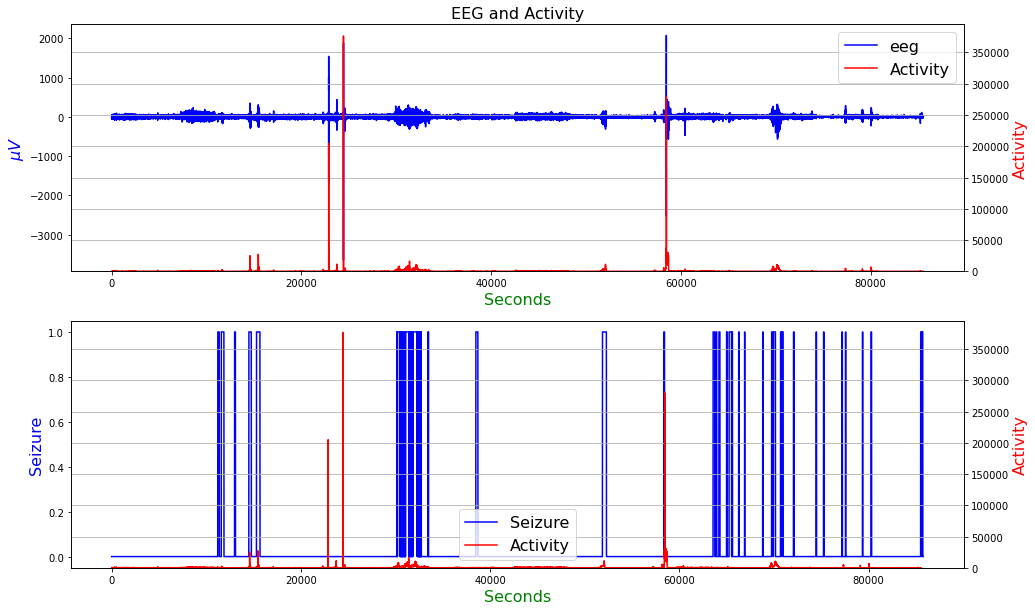

In [28]:
#Plot the this feature using the plot3 function
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], Activity_Feature,featuretime, "Activity")

Once again a slight relationship can be seen in the data indicating this may be a useful feature.

### 5. 2nd Hjorth Parameter: Mobility

\begin{equation}
x_{\Delta}(n) = x(n+1) - x(n)
\end{equation}

\begin{equation}
\mu_{\Delta} = \frac{1}{N-1} \sum_{k=0}^{N-2} x_{\Delta}(k)
\end{equation}


\begin{equation}
\sigma_{\Delta}^2 = \frac{1}{N-1} \sum_{k=0}^{N-2} (x_{\Delta}(k) - \mu_{\Delta})^2
\end{equation}

\begin{equation}
mobility = \frac{\sigma_{\Delta}^2}{activity}
\end{equation}
where:

* $mobility$ is the Mobility of the epoch
* $\sigma_{\Delta}^2$ is the variance of the first derivative of the signal within the epoch
* $activity$ is the Variance of the signal within the epoch
* $\mu_{\Delta}$ is the mean of the first derivative of the epoch
* $x_{\Delta}(n)$ is the first derivative of the signal at time instant $n$



In [29]:
#Define a function to calculate the mean of the first derivative of the epoch values.
#It takes N (the number of values in an epoch) and epoch (an array containing the epoch values) as inputs
def MeanFirstDeriv(N, epoch):
    #Calculate this values using the given formula
    Mean = (1/(N-1))*sum((epoch[i+1]-epoch[i]) for i in range(N-1))
    return Mean #Return the mean value

In [30]:
#Define a function to calculate the variance of the first derivative of the epoch values.
#It takes N (the number of values in an epoch) and epoch (an array containing the epoch values) as inputs
def VarFirstDeriv(N,epoch):
    #Caclulate the mean value using the function above
    Mean = MeanFirstDeriv(N, epoch)
    #Use this to calculate the variance of the first derivate using the given formula
    Var = (1/(N-1))*sum(((epoch[i+1]- epoch[i])- Mean)**2 for i in range(N-1))
    return Var

In [31]:
#Define a function to calculate the mobility of the epoch values.
#It takes N (the number of values in an epoch) and epoch (an array containing the epoch values) as inputs
def Mobilitycalculation(N, epoch):
    #Calculate the variance of the first derivate
    Var = VarFirstDeriv(N, epoch)
    #Calculate the activity value
    Activity = Activitycalculation(N,epoch)
    #Use these to calculate the mobility
    Mobility = np.sqrt(Var/Activity)
    return Mobility #Return the mobility value

In [32]:
epochstart=0 #Set epochstart to 0
Mobility_Feature = np.array([]) #Define an array to hold the feature values
for i in range(numberofEpochs): #Iterate through a for loop for each epoch
    #Find the eeg values in the Cz-C3 channel in the current epoch using loc. Convert this to a numpy array using to_numpy()
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    epochstart += Noverlap #Add Noverlap (128) to the epochstart value
    #Find the feature value for the current epoch using the function define above
    #Append this value to the array using the append function
    Mobility_Feature=np.append(Mobility_Feature, Mobilitycalculation(NEpoch, Epoch))

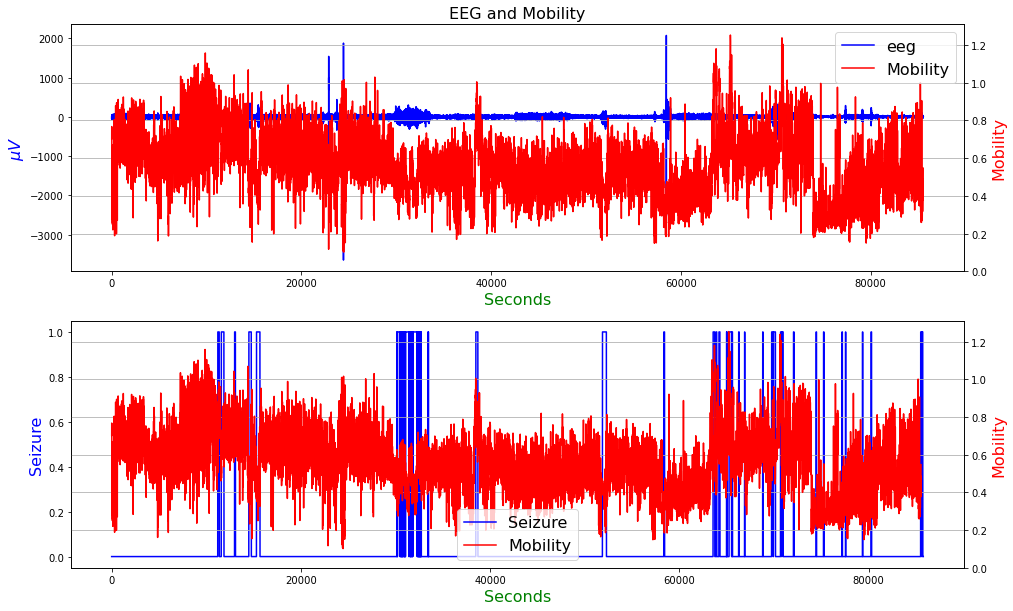

In [33]:
#Plot the this feature using the plot3 function
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], Mobility_Feature,featuretime, "Mobility")

It is harder to see potential relationships between Mobility and Seizure in this graph due to the noisyness of the graph.

### 6. 3rd Hjorth Parameter: Complexity
\begin{equation}
x_{\Delta^2}(n) = x_{\Delta}(n+1) - x_{\Delta}(n)
\end{equation}

\begin{equation}
\mu_{\Delta^2} = \frac{1}{N-2}\sum_{k=0}^{N-3} x_{\Delta^2}(k)
\end{equation}


\begin{equation}
\sigma^2_{\Delta^2} = \frac{1}{N-2}\sum_{k=0}^{N-3} (x_{\Delta^2}(k) - \mu_{\Delta^2})^2
\end{equation}

\begin{equation}
complexity = \frac{\sigma^2_{\Delta^2}}{\sigma^2_{x}}
\end{equation}

where:

* $\sigma^2_{\Delta^2}$ is the variance of the second derivative of the epoch
* $\sigma^2_x$ is the activity of the epoch
* $\sigma^2_{\Delta}$ is the variance of the first derivative of the epoch
* $\mu_{\Delta^2}$ is the mean of the second derivative of an epoch
* $x_{\Delta^2}(n)$ is the second derivative of the signal at time instant 𝑛

In [34]:
#Define a function to calculate the mean of the second derivative of the epoch values.
#It takes N (the number of values in an epoch) and epoch (an array containing the epoch values) as inputs
def MeanSecondDeriv(N, epoch):
    #Calculate this mean value
    Mean = (1/N-2)*sum(((epoch[i+2] - epoch[i+1])-(epoch[i+1] - epoch[i])) for i in range(N-2))
    return Mean #Return this value

In [35]:
#Define a function to calculate the variance of the second derivative of the epoch values.
#It takes N (the number of values in an epoch) and epoch (an array containing the epoch values) as inputs
def VarSecondDeriv(N,epoch):
    #Caclulate the mean value using the function above
    Mean = MeanSecondDeriv(N, epoch)
    #Use this to calculate the variance of the first derivate using the given formula   
    Var = (1/(N-2))*sum((((epoch[i+2] - epoch[i+1])-(epoch[i+1] - epoch[i]))- Mean)**2 for i in range(N-2))
    return Var #Return this variance value

In [36]:
#Define a function to calculate the complexity of the epoch values.
#It takes N (the number of values in an epoch) and epoch (an array containing the epoch values) as inputs
def Complexitycalculation(N, epoch):
    #Calculate the variance of the second derivate
    Var = VarSecondDeriv(N, epoch)
    #Calculate the activity value
    Activity = Activitycalculation(N,epoch)
    #Use these to calculate the complexity
    Complexity = np.sqrt(Var/Activity)
    return Complexity #Return the complexity value

In [37]:
epochstart=0 #Set epochstart to 0
Complexity_Feature = np.array([]) #Define an array to hold the feature values
for i in range(numberofEpochs): #Iterate through a for loop for each epoch
    #Find the eeg values in the Cz-C3 channel in the current epoch using loc. Convert this to a numpy array using to_numpy()
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    epochstart += Noverlap #Add Noverlap (128) to the epochstart value
    #Find the feature value for the current epoch using the function define above
    #Append this value to the array using the append function
    Complexity_Feature=np.append(Complexity_Feature, Complexitycalculation(NEpoch, Epoch))

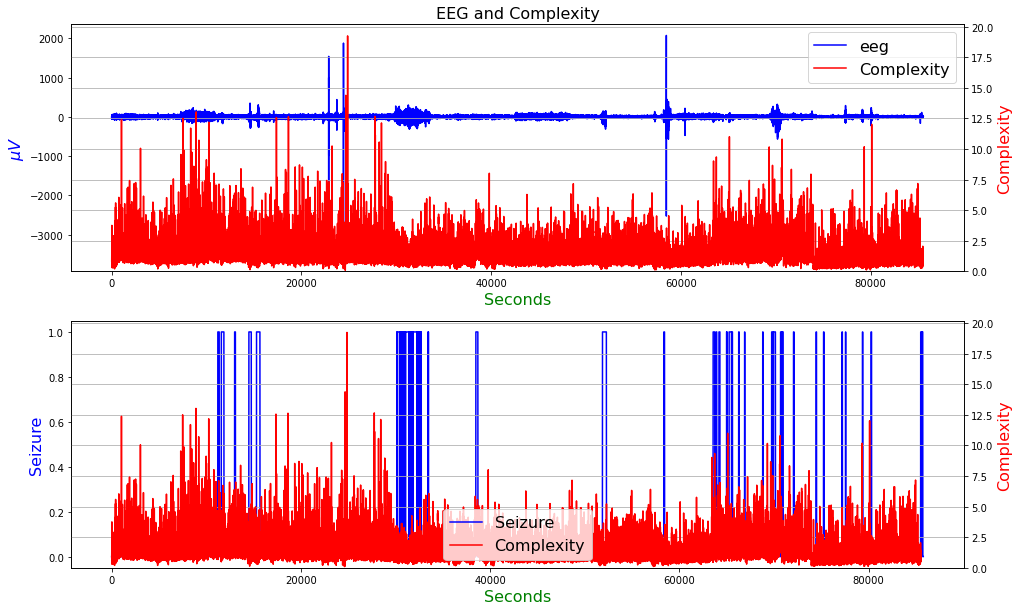

In [38]:
#Plot the this feature using the plot3 function
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], Complexity_Feature,featuretime, "Complexity")

There is no clear relationship in this graph that is consistent throughout its data.

## 3.2. Frequency Domain Features

After this, functions for the frequency domain features were created as shown in to slides provided. These functions invloved the periodogram value of each epoch. Similarly to the time domain features, they were applied to each epoch of the data and plotted 

### 7. Intensity Weighted Mean Frequency (IWMF)
\begin{equation}
fm = \frac{\sum_{i=0}^{N/2-1}p_i\cdot if_i}{\sum_{i=0}^{N/2-1}p_i}
\end{equation}

* $N$ is the total number of samples in the signal epoch
* $p_i$ is the power at frequency bin $i$ in the signal epoch
* $df$ is the frequency resolution of each bin, which is calculated as the sampling frequency $Fs$ divided by the total number of samples $N$
* $i$ is the frequency bin number, with $i=0,1,2,...,N/2-1$
* $fm$ is the intensity weighted mean frequency
* $df = \frac{F_s}{N}$

In [39]:
#Define a function to calculate the IWMF of the epoch values.
#It takes psd (the periodogram value), fs (the sampling frequency 32Hz) and N (number of values in an epoch) as inputs
def fmcalculation(psd, fs, N):
    #Caclulate df using the given formula
    df = fs/N # fs is the sampling freaquency = 32Hz
    #Calculate the numerator of the given formula for IWMF
    num = df * sum(psd[i]*i for i in range((N//2)-1))
    #Calculate the denominator for the given formula
    den = sum(psd[i] for i in range((N//2)-1))
    return num/den #Return the IWMF value

In [40]:
epochstart=0 #Set epochstart to 0
FM_Feature = np.array([]) #Define an array to hold the feature values
for i in range(numberofEpochs): #Iterate through a for loop for each epoch
    #Find the eeg values in the Cz-C3 channel in the current epoch using loc. Convert this to a numpy array using to_numpy()
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    #Calculate the periodogram value for the epoch
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap #Add Noverlap (128) to the epochstart value
    #Find the feature value for the current epoch using the function define above
    #Append this value to the array using the append function
    FM_Feature=np.append(FM_Feature,fmcalculation(PSD, 32, NEpoch))

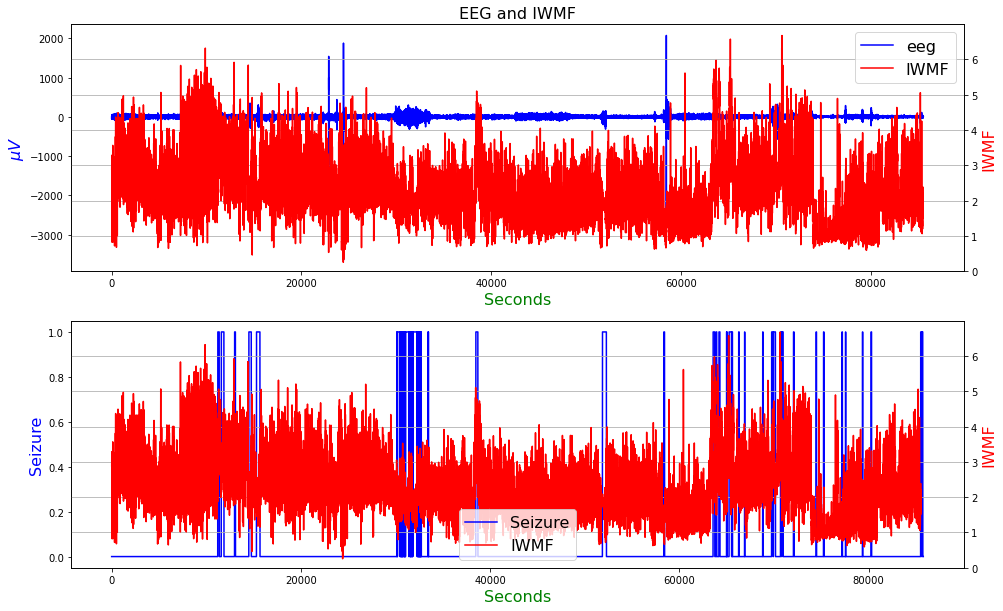

In [41]:
#Plot the this feature using the plot3 function
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], FM_Feature,featuretime, "IWMF")

Once again there are no noticeable patterns in this plot.

### 8. Intensity Weighted Bandwidth

\begin{equation}
bw = \frac{\sum_{i=0}^{N/2-1} p_i (f_m - idf)^2}{\sum_{i=0}^{N/2-1} p_i}
\end{equation}

where:

* $bw$ is the Intensity Weighted Bandwidth
* $f_m$ is the Intensity Weighted Mean Frequency for the same epoch
* $N$ is the number of samples in the epoch
* $p_i$ is the estimated power in the $i$-th frequency bin, with $i=0,...,\frac{N}{2}-1$

In [42]:
#Define a function to calculate the IWBW of the epoch values.
#It takes psd (the periodogram value), fs (the sampling frequency 32Hz) and N (number of values in an epoch) as inputs
def bwcalculation(psd, fs, N):
    #Calcualte the IWMF using the above formula
    fm = fmcalculation(psd, fs, N)
    #Caclulate df using the given formula
    df = fs/N # fs is the sampling freaquency = 32Hz   
    num = sum(psd[i]*((fm - i*df)**2) for i in range((N//2)-1))  #Calculate the numerator of the given formula
    den = sum(psd[i] for i in range((N//2)-1))  #Calculate the denominator for the given formula
    return np.sqrt(num/den) #Return the IWBW value

In [43]:
epochstart=0 #Set epochstart to 0
BW_Feature = np.array([]) #Define an array to hold the feature values
for i in range(numberofEpochs): #Iterate through a for loop for each epoch
    #Find the eeg values in the Cz-C3 channel in the current epoch using loc. Convert this to a numpy array using to_numpy()
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    #Calculate the periodogram value for the epoch
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap #Add Noverlap (128) to the epochstart value
    #Find the feature value for the current epoch using the function define above
    #Append this value to the array using the append function
    BW_Feature=np.append(BW_Feature,bwcalculation(PSD, 32, NEpoch))

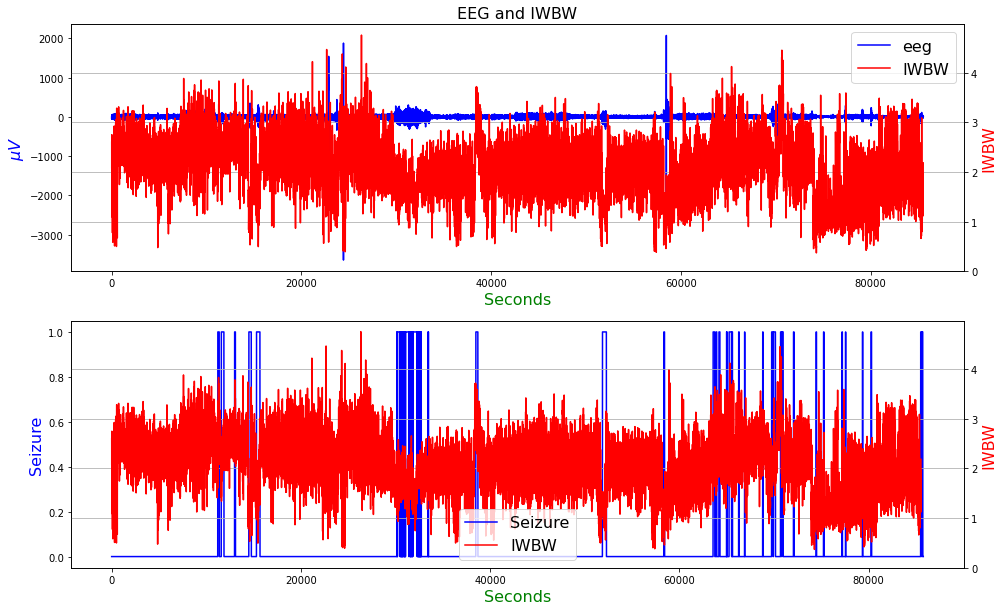

In [44]:
#Plot the this feature using the plot3 function
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], BW_Feature,featuretime, "IWBW")

There is no clear relationship between seizure and IWBW in this plot.

### 9. Total Power

\begin{equation}
tp = \sum_{i=0}^{N/2-1} p_i
\end{equation}

where:
* $i$ is the frequency bin number, with $i = 0, 1, ..., \frac{N}{2}-1$
* $p_i$ is the estimated power in that bin.

In [45]:
#Define a function to calculate the total power of the epoch values.
#It takes psd (the periodogram values) and N (number of values in an epoch) as inputs
def tpcalculation(psd, N):
    tp = sum(psd[i] for i in range((N//2)-1)) #Sum up each of the periodogram values
    return tp #Return the tp value

In [46]:
epochstart=0 #Set epochstart to 0
TP_Feature = np.array([]) #Define an array to hold the feature values
for i in range(numberofEpochs): #Iterate through a for loop for each epoch
    #Find the eeg values in the Cz-C3 channel in the current epoch using loc. Convert this to a numpy array using to_numpy()
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    #Calculate the periodogram value for the epoch
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap #Add Noverlap (128) to the epochstart value
    #Find the feature value for the current epoch using the function define above
    #Append this value to the array using the append function
    TP_Feature=np.append(TP_Feature,tpcalculation(PSD,  NEpoch))

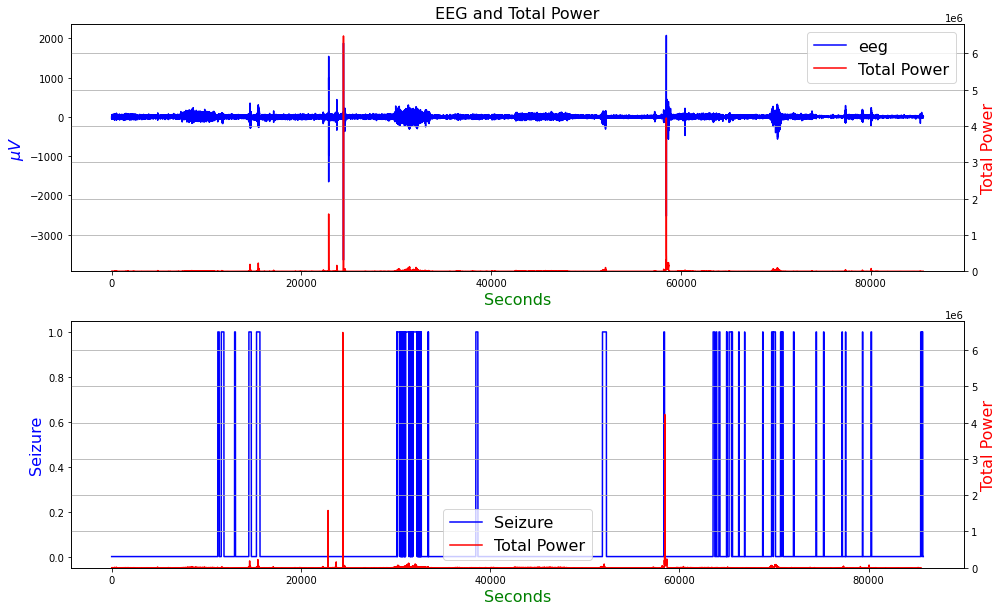

In [47]:
#Plot the this feature using the plot3 function
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], TP_Feature,featuretime, "Total Power")

There appears to be a slight increase in total power whenever a seizure is present in this plot. Perhaps this is a useful feature.

### 10. Peak Frequency

\begin{equation}
pf = \frac{Fs \times i}{N}
\end{equation}

where: 
* $i$ is the frequency bin number with maximum power
* $Fs$ is the sampling frequency

In [48]:
#Define a function to calculate the peak frequency of the epoch values.
#It takes psd (the periodogram values), fs (the sampling frequency 32Hz) and N (number of values in an epoch) as inputs
def pfcalculation(psd, fs, N):
    k=0 #Set k to 0
    max = psd[0] #Set max as the first periodogram value 
    for i in range(1,128): #Iterate through the periodogram values
        if (psd[i] > max): #If the current periodogram value is greater than max
            k = i #Then set k to the index of this value
            max = psd[i] #Set this value as the max
    return k * (fs/N) #Return the index of the max* fs/N

In [49]:
epochstart=0 #Set epochstart to 0
PF_Feature = np.array([]) #Define an array to hold the feature values
for i in range(numberofEpochs): #Iterate through a for loop for each epoch
    #Find the eeg values in the Cz-C3 channel in the current epoch using loc. Convert this to a numpy array using to_numpy()
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    #Calculate the periodogram value for the epoch
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap #Add Noverlap (128) to the epochstart value
    #Find the feature value for the current epoch using the function define above
    #Append this value to the array using the append function
    PF_Feature=np.append(PF_Feature,pfcalculation(PSD, 32, NEpoch))

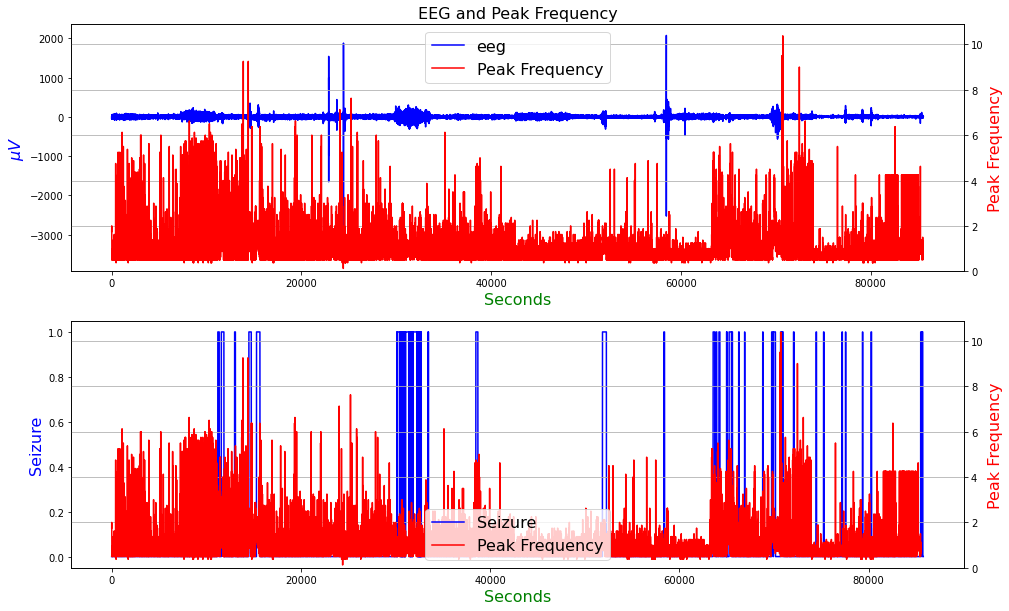

In [50]:
#Plot the this feature using the plot3 function
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], PF_Feature,featuretime, "Peak Frequency")

There is perhaps a slight increase in peak frequency when a seizure is present but it does not appear be a very strong relationsip.

### 11. Spectral Edge Frequency 85

This is defined as the frequency below which 85% of the total power tp in the signal exists.


In [51]:
#Define a function to calculate the SEF85 of the epoch values.
#It takes psd (the periodogram of the epoch), fs (the sampling frequency 32Hz) and N (number of values in an epoch) as inputs
def SEF85calculation(psd, fs, N):
    tp = tpcalculation(psd, N) #Calcualte the total power
    sef85 = 0 #Set the sef85 value to 0
    i = 0 #Set i to 0
    while(sef85< 0.85*tp): #while sef85 is less than 85% of the total power
        sef85+= psd[i] #Add the current periodogram value to the current sef85 value
        i+=1 #Increase the index value by 1
    sef85 = (i-1)*(fs/N) #Calcualte sef85 using the given formula
    return sef85 #Return this value

In [52]:
epochstart=0 #Set epochstart to 0
SEF85_Feature = np.array([]) #Define an array to hold the feature values
for i in range(numberofEpochs): #Iterate through a for loop for each epoch
    #Find the eeg values in the Cz-C3 channel in the current epoch using loc. Convert this to a numpy array using to_numpy()
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    #Calculate the periodogram value for the epoch
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap #Add Noverlap (128) to the epochstart value
    #Find the feature value for the current epoch using the function define above
    #Append this value to the array using the append function
    SEF85_Feature=np.append(SEF85_Feature,SEF85calculation(PSD, 32, NEpoch))

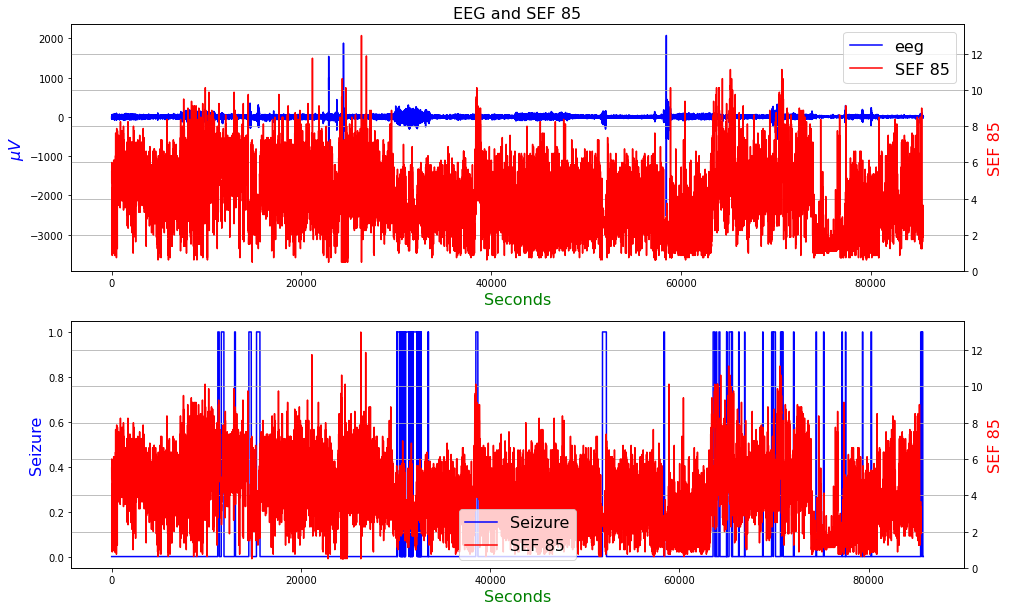

In [53]:
#Plot the this feature using the plot3 function
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], SEF85_Feature,featuretime, "SEF 85")

No noticeable relationship in this graph.

### 12. Spectral Edge Frequency 90
This is defined as the frequency below which 90% of the total power tp in the signal exists.


In [54]:
#Define a function to calculate the SEF90 of the epoch values.
#It takes psd (the periodogram of the epoch), fs (the sampling frequency 32Hz) and N (number of values in an epoch) as inputs
def SEF90calculation(psd, fs, N):
    tp = tpcalculation(psd, N) #Calcualte the total power
    sef90 = 0 #Set the sef90 value to 0
    i = 0 #Set i to 0
    while(sef90< 0.9*tp): #while sef90 is less than 90% of the total power
        sef90+= psd[i] #Add the current periodogram value to the current sef90 value
        i+=1 #Increase the index value by 1
    sef90 = (i-1)*(fs/N) #Calcualte sef90 using the given formula
    return sef90 #Return this value

In [55]:
epochstart=0 #Set epochstart to 0
SEF90_Feature = np.array([]) #Define an array to hold the feature values
for i in range(numberofEpochs): #Iterate through a for loop for each epoch
    #Find the eeg values in the Cz-C3 channel in the current epoch using loc. Convert this to a numpy array using to_numpy()
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap #Add Noverlap (128) to the epochstart value
    #Find the feature value for the current epoch using the function define above
    #Append this value to the array using the append function
    SEF90_Feature=np.append(SEF90_Feature,SEF90calculation(PSD, 32, NEpoch))

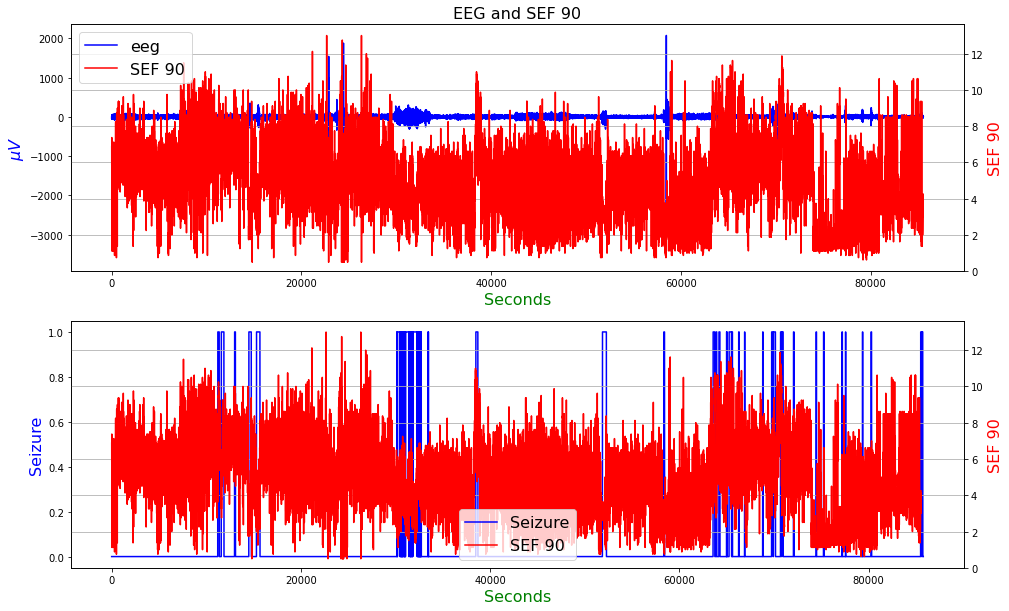

In [56]:
#Plot the this feature using the plot3 function
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], SEF90_Feature,featuretime, "SEF 90")

There is no obvious relationship between seizure and SEF 90.

### 13. Spectral Edge Frequency 95
This is defined as the frequency below which 95% of the total power tp in the signal exists.


In [57]:
#Define a function to calculate the SEF95 of the epoch values.
#It takes psd (the periodogram of the epoch), fs (the sampling frequency 32Hz) and N (number of values in an epoch) as inputs
def SEF95calculation(psd, fs, N):
    tp = tpcalculation(psd, N) #Calcualte the total power
    sef95 = 0 #Set the sef95 value to 0
    i = 0 #Set i to 0
    while(sef95< 0.95*tp): #while sef95 is less than 95% of the total power
        sef95+= psd[i] #Add the current periodogram value to the current sef95 value
        i+=1 #Increase the index value by 1
    sef95 = (i-1)*(fs/N) #Calcualte sef95 using the given formula
    return sef95 #Return this value

In [58]:
epochstart=0 #Set epochstart to 0
SEF95_Feature = np.array([]) #Define an array to hold the feature values
for i in range(numberofEpochs): #Iterate through a for loop for each epoch
    #Find the eeg values in the Cz-C3 channel in the current epoch using loc. Convert this to a numpy array using to_numpy()
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap #Add Noverlap (128) to the epochstart value
    #Find the feature value for the current epoch using the function define above
    #Append this value to the array using the append function
    SEF95_Feature=np.append(SEF95_Feature,SEF95calculation(PSD, 32, NEpoch))

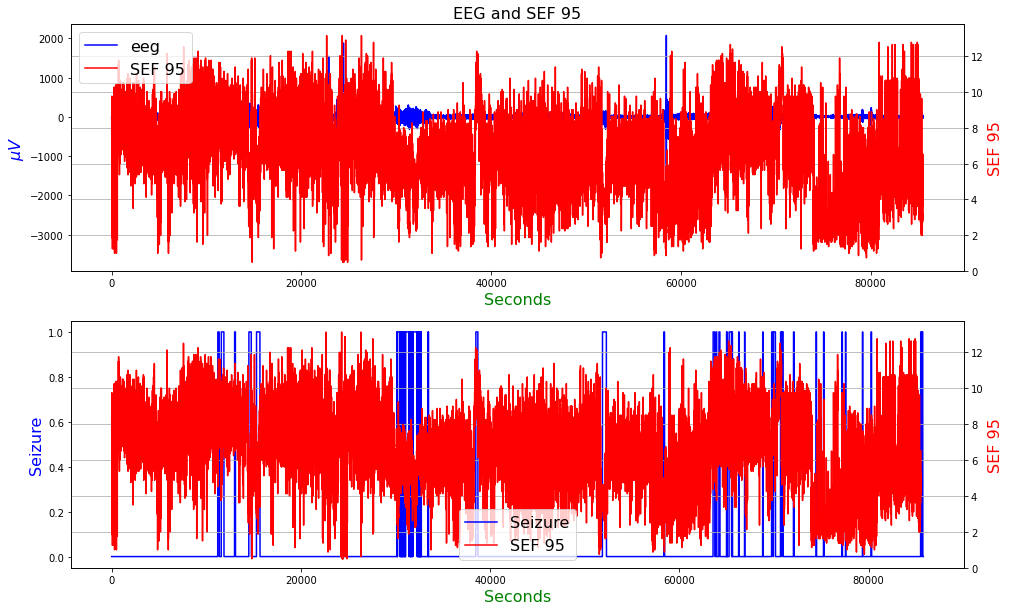

In [59]:
#Plot the this feature using the plot3 function
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], SEF95_Feature,featuretime, "SEF 95")

Once again, there is not clear relationship.

### 14 - 25. Power in Specific Bands

This is the sum of the power values in a particular frequency band.

In [60]:
#Define a function to calculate the power in specific bands of the epoch values.
#It takes psd (the periodogram of the epoch), N (number of values in an epoch) and 
#freq_band (the frequency band to be calculated)as inputs
def bandpowercalculation(psd, N, freq_band):
    #Calculae the sum of the periodogram values while the index is within the frequency band
    band_power = sum(psd[i] for i in range((N//2)-1) if freq_band[0] <= i < freq_band[1])
    return band_power #Return this value


In [61]:
epochstart=0 #Set epochstart to 0
#Define an array to hold the features
band02_Feature=band13_Feature=band24_Feature =band35_Feature =band46_Feature =band57_Feature =band68_Feature =band79_Feature =band810_Feature =band911_Feature =band1012_Feature =band1113_Feature = np.array([])
for i in range(numberofEpochs): #Iterate through a for loop for each epoch
    #Find the eeg values in the Cz-C3 channel in the current epoch using loc. Convert this to a numpy array using to_numpy()
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap #Add Noverlap (128) to the epochstart value
    #Find the feature value for the current epoch using the function define above
    #Append this value to the array using the append function
    #Repeat this for each of the band intervals
    band02_Feature=np.append(band02_Feature,bandpowercalculation(PSD, 32, ([0,2])))
    band13_Feature=np.append(band13_Feature,bandpowercalculation(PSD, 32, ([1,3])))
    band24_Feature=np.append(band24_Feature,bandpowercalculation(PSD, 32, ([2,4])))
    band35_Feature=np.append(band35_Feature,bandpowercalculation(PSD, 32, ([3,5])))
    band46_Feature=np.append(band46_Feature,bandpowercalculation(PSD, 32, ([4,6])))
    band57_Feature=np.append(band57_Feature,bandpowercalculation(PSD, 32, ([5,7])))
    band68_Feature=np.append(band68_Feature,bandpowercalculation(PSD, 32, ([6,8])))
    band79_Feature=np.append(band79_Feature,bandpowercalculation(PSD, 32, ([7,9])))
    band810_Feature=np.append(band810_Feature,bandpowercalculation(PSD, 32, ([8,10])))
    band911_Feature=np.append(band911_Feature,bandpowercalculation(PSD, 32, ([9,11])))
    band1012_Feature=np.append(band1012_Feature,bandpowercalculation(PSD, 32, ([10,12])))
    band1113_Feature=np.append(band1113_Feature,bandpowercalculation(PSD, 32, ([11,13])))

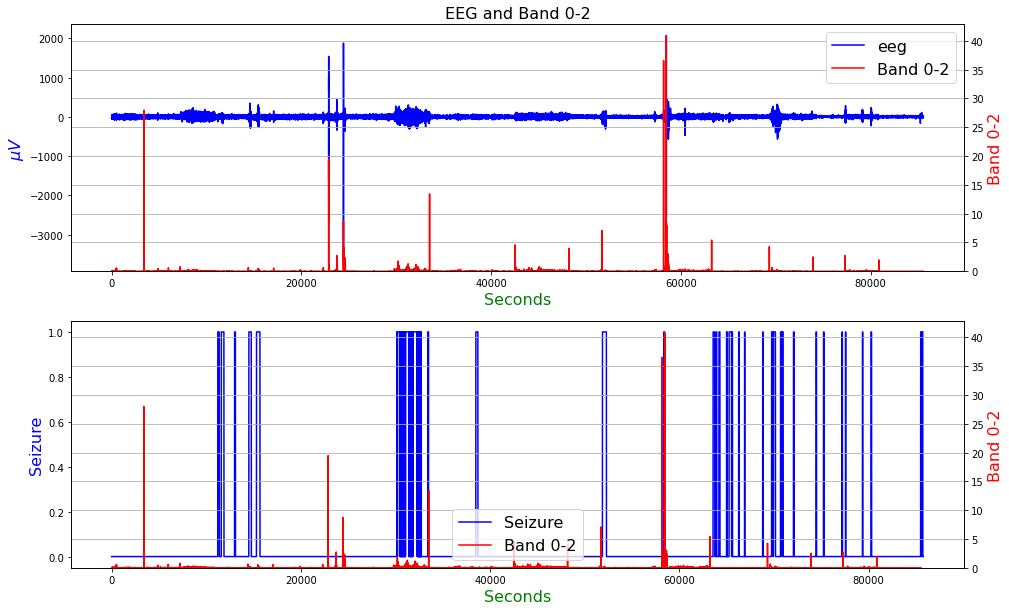

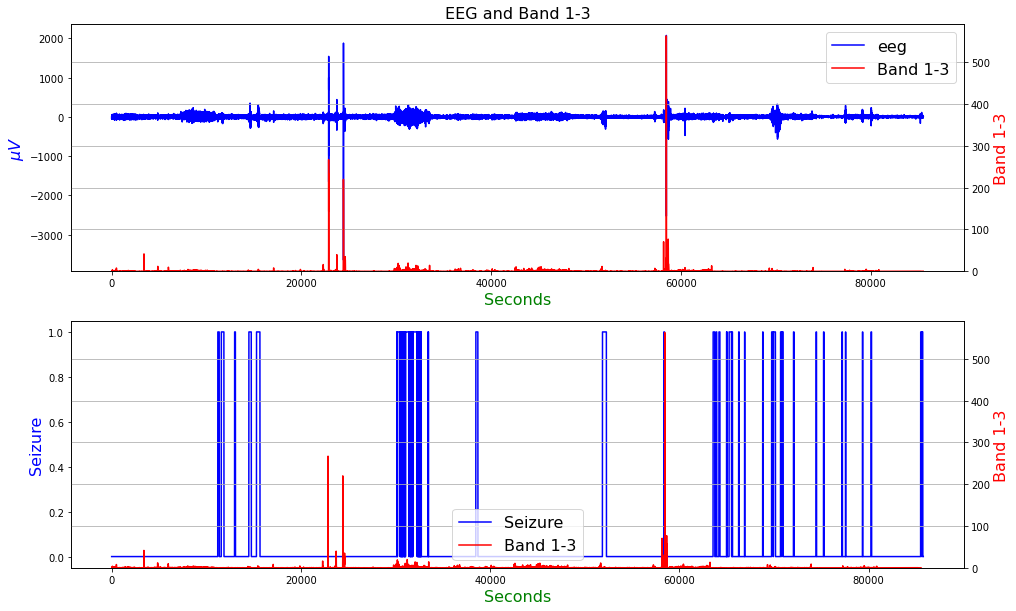

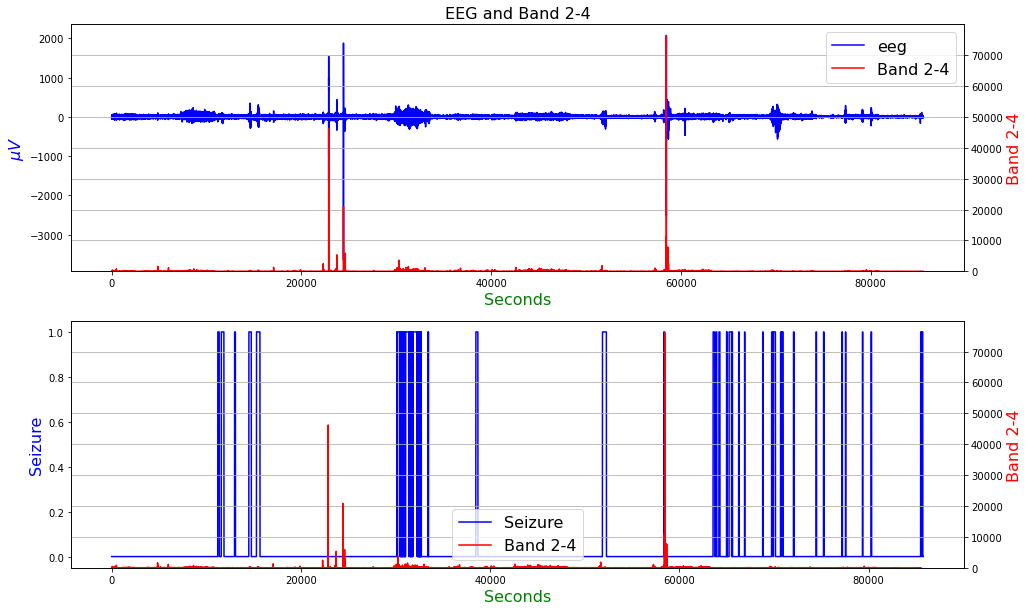

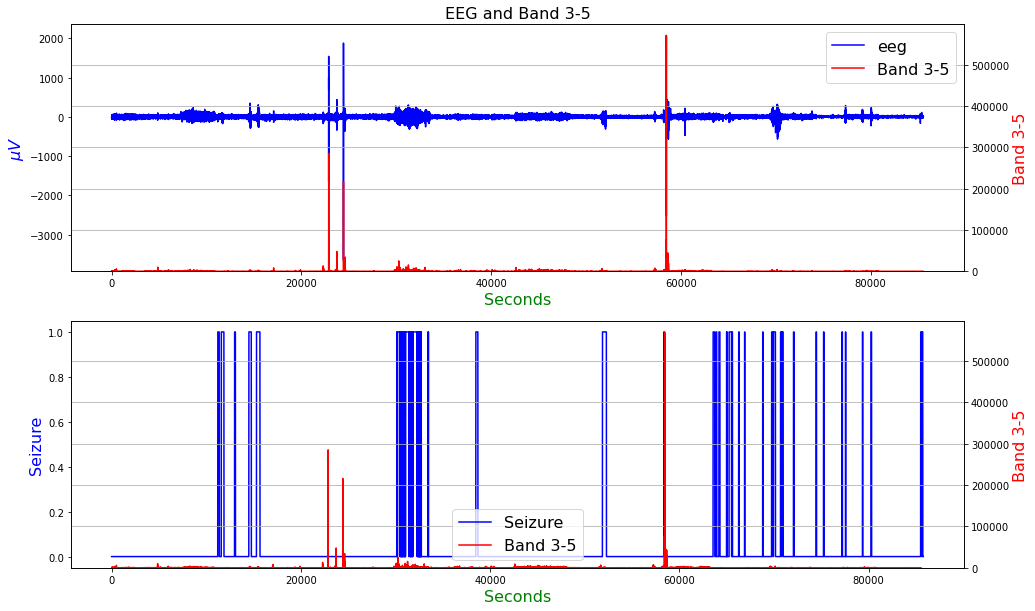

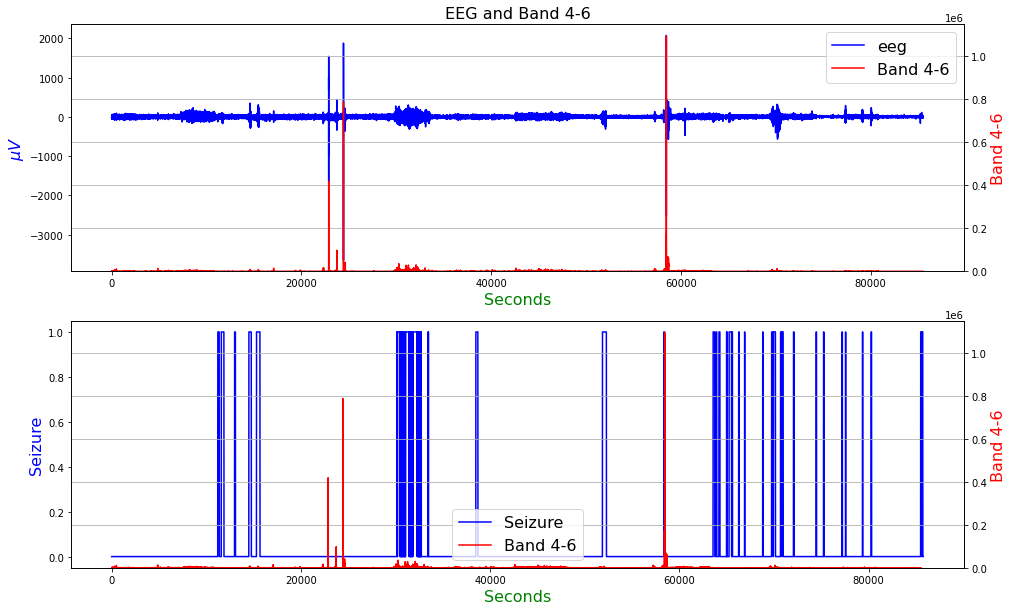

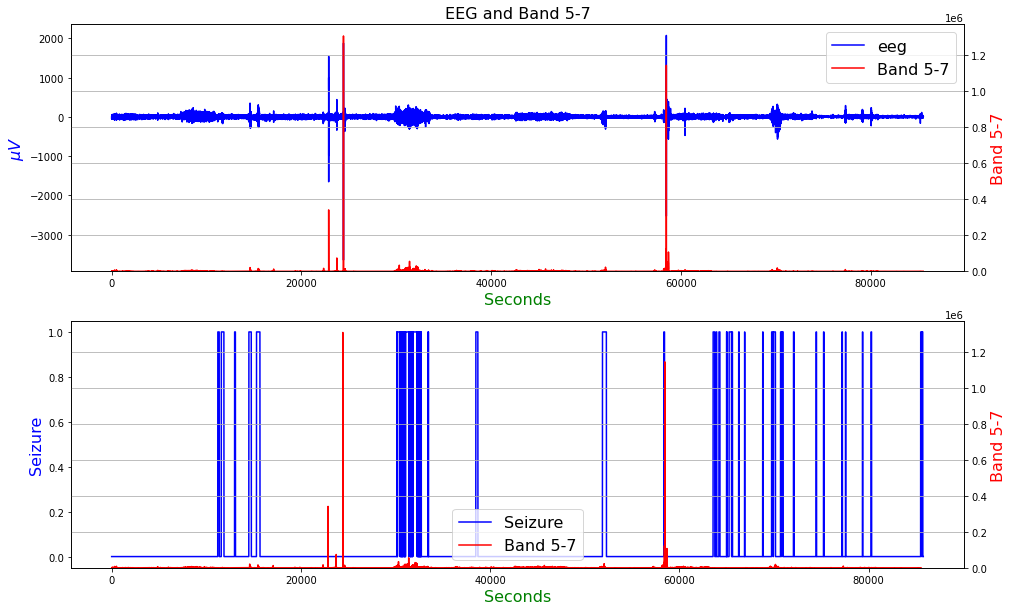

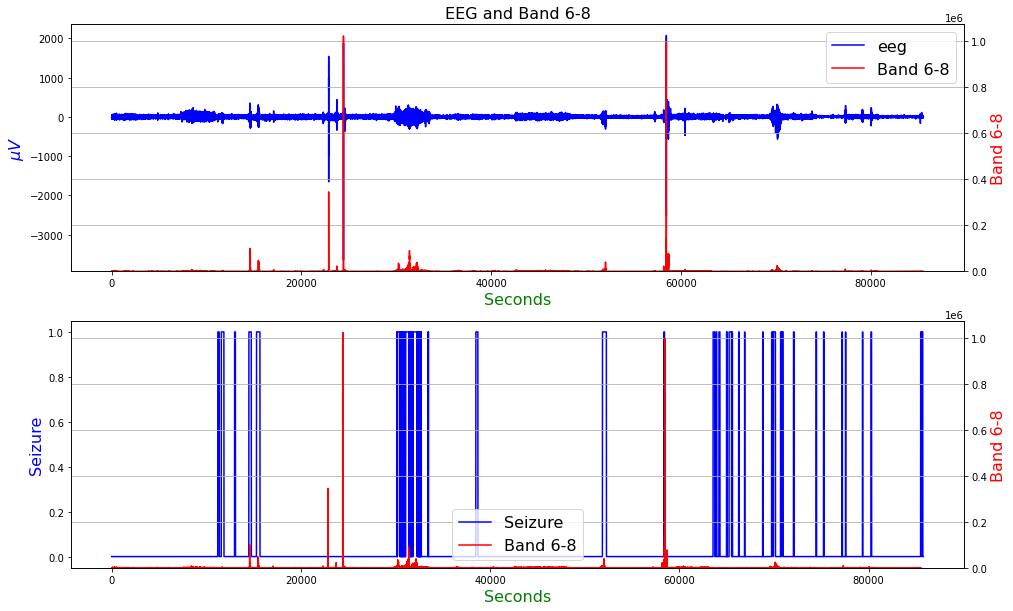

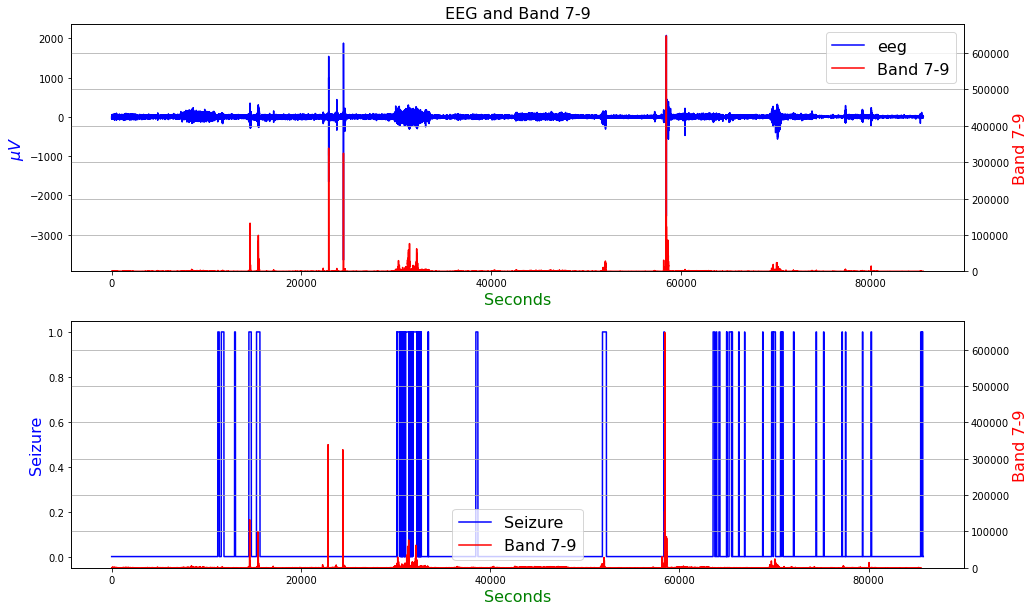

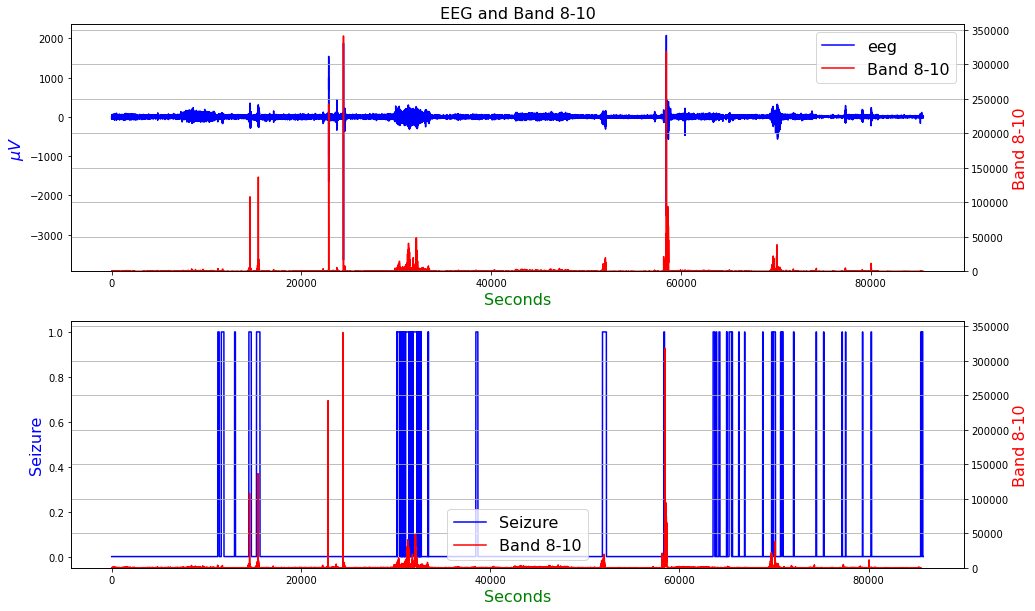

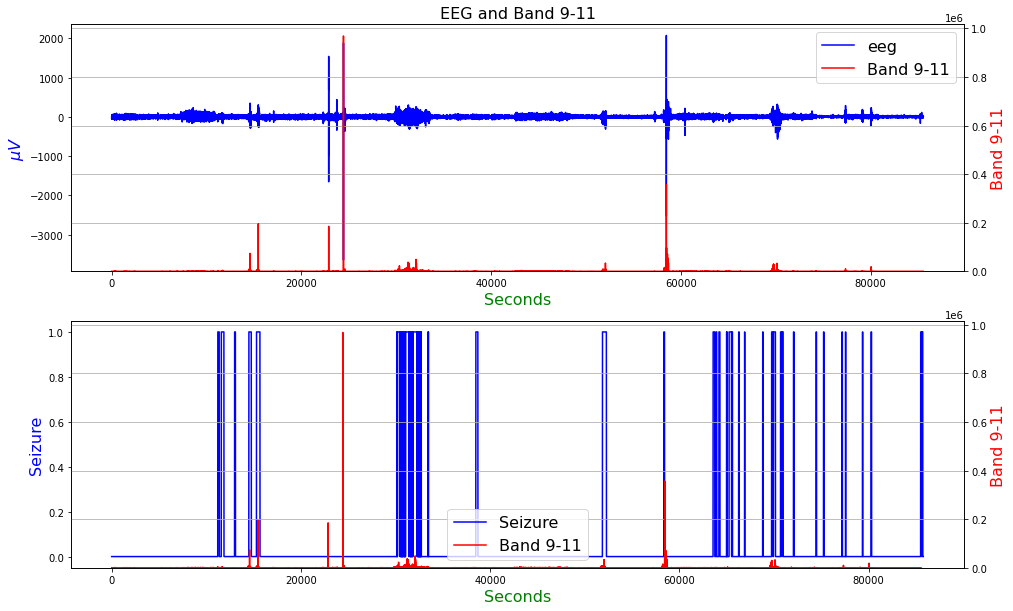

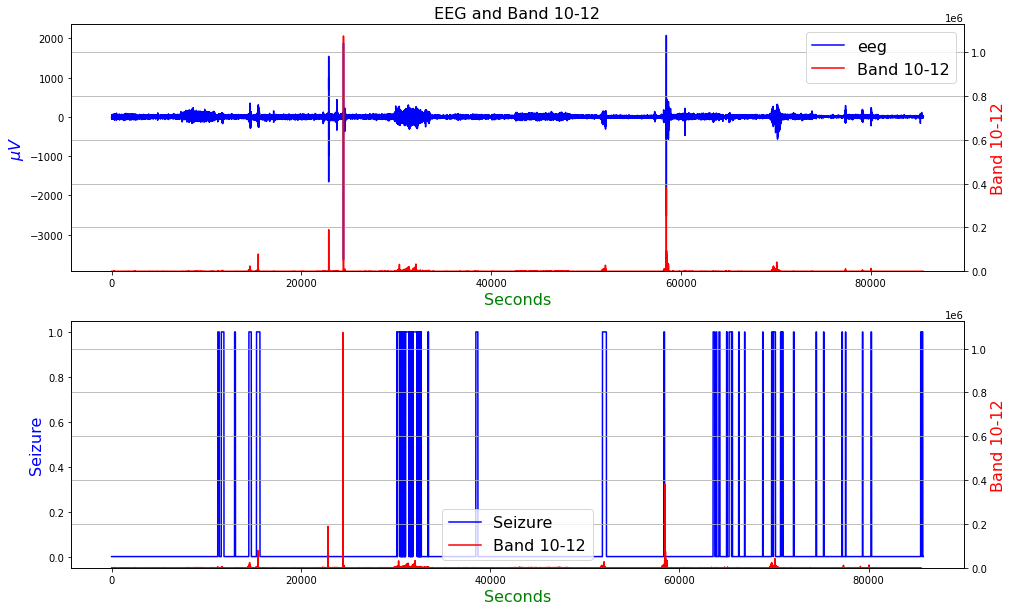

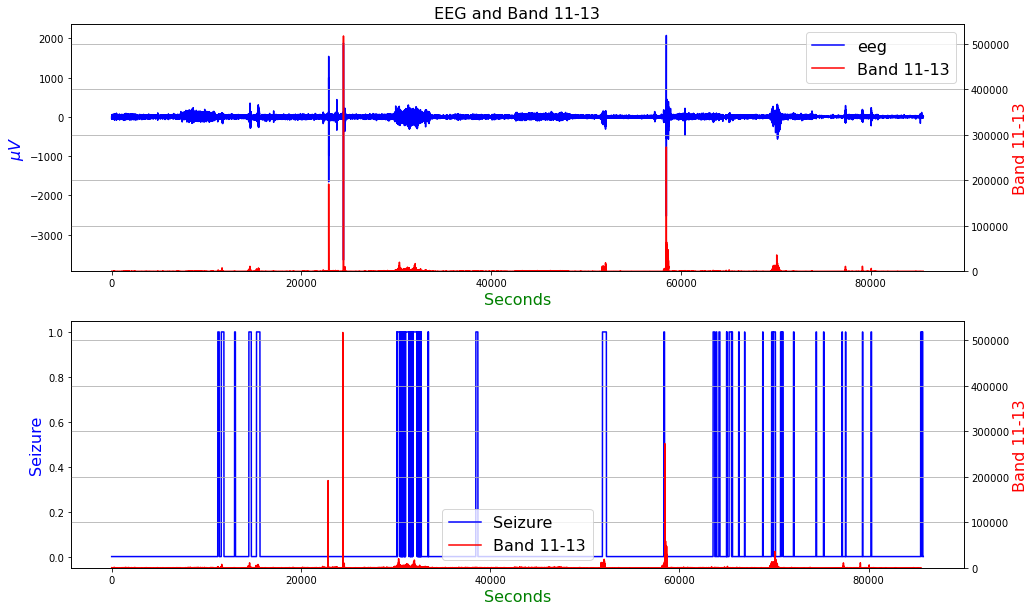

In [62]:
#Plot each of these features using the plot3 function
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], band02_Feature,featuretime, "Band 0-2")
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], band13_Feature,featuretime, "Band 1-3")
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], band24_Feature,featuretime, "Band 2-4")
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], band35_Feature,featuretime, "Band 3-5")
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], band46_Feature,featuretime, "Band 4-6")
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], band57_Feature,featuretime, "Band 5-7")
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], band68_Feature,featuretime, "Band 6-8")
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], band79_Feature,featuretime, "Band 7-9")
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], band810_Feature,featuretime, "Band 8-10")
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], band911_Feature,featuretime, "Band 9-11")
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], band1012_Feature,featuretime, "Band 10-12")
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], band1113_Feature,featuretime, "Band 11-13")

These plots appear to shown a slight increase in the power in a band when a seizure is present.

## 3.3. Combining Features
Next the data had to be preprocessed more before creating the first model. Having created each of the feature arrays for the data, they where then combined into a single dataset.

In [63]:
#Combine all of the features into a matrix using the column_stack function. 
#This will allow them to be used to create models
features = np.column_stack((LL_Feature, RMSA_Feature,NLE_Feature,
                            Activity_Feature, Mobility_Feature, Complexity_Feature,
                            FM_Feature,BW_Feature, TP_Feature, PF_Feature, 
                            SEF90_Feature, SEF85_Feature,SEF95_Feature,
                           band02_Feature, band13_Feature, band24_Feature, band35_Feature, band46_Feature, 
                            band57_Feature, band68_Feature, band79_Feature, band810_Feature, band911_Feature,
                            band1012_Feature, band1113_Feature))

The shape of the feature matrix was found. This indicates there are 21,387 samples and 25 features currently in the dataset.

In [64]:
#Check the shape of the matrix
np.shape(features)

(21387, 25)

The data was then split into training and validation data. These allow the model to be trained and its performance to be evaluated. A relatively low validation size of 10% was used. This allows the majority of the data to be used for training. A large validation dataset was not deemed necessary as a separate test dataset has been provided.

In [65]:
#Use the train_test_split function to split the feature matrix and labels into train and validation data
X_train, X_val, y_train, y_val = train_test_split(features, CzC3_labels, test_size=0.1, random_state=1) 

## 3.4. Balancing the Dataset (f)
Then, the number if samples in the training data which correspond to non-seizure and seizure were found to check for a class imbalance. This is when we have significantly more samples in one class than the other. [This article](https://towardsdatascience.com/class-imbalance-a-classification-headache-1939297ff4a4#:~:text=Why%20is%20this%20a%20problem,classification%20of%20the%20minority%20class.) states that most machine learning algorithms assme equally distributed data and theat class imbalance can lead to bias towards the majority class.

In [66]:
#Check the number of values in y_train that are 0 (i.e. non-seizure) and are 1 (seizure)
#This is done using the where and len functions
len(np.where(y_train ==0)[0]), len(np.where(y_train ==1)[0])

(17990, 1258)

Clearly there is a class imbalance in the training data as the vast majority of the samples are in the non seizure class. The [article](https://towardsdatascience.com/class-imbalance-a-classification-headache-1939297ff4a4#:~:text=Why%20is%20this%20a%20problem,classification%20of%20the%20minority%20class.) says that undersampling can be used to remedy this issue. This involves removing random obsevations from the majority class until the classes are balanced. The downside of this is that it will significantly reduce the dataset.
Undersampling was performed on the data to balance the dataset.

In [67]:
#Create the undersampler object. Set the random state for reproduceable results
undersampler = RandomUnderSampler(random_state=42)

#Use the undersample.fit function to undersample the training data
#This ensures half the data has the seizure label and half is non-seizure
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [68]:
#Check the new length of the X and y data
len(X_train_resampled), len(y_train_resampled)

(2516, 2516)

In [69]:
#Check the number of values in y_train that are 0 (i.e. non-seizure) and are 1 (seizure)
#This is again done using the where and len functions
len(np.where(y_train_resampled ==0)[0]), len(np.where(y_train_resampled ==1)[0])

(1258, 1258)

Clearly a significant amount of data has been lost with the dataset reducing from 17,990 to 1,258 but the classes are now balanced with 1,258 samples with each label. This will result in a significantly less biased model.

# 4. First Model

## 4.1. Description and justification for using Random Forest (d)
A [random forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2) classifier was used for this report. This is an ensemble machine learning algorithm in which a large number of decision trees are created and their outputs are combined to produce an overall final prediction via a voting system. Each tree uses bagging on the training dataset (i.e. randomly sampling the dataset with replacement) to ensure each tree is relatively uncorrelated. A random subset of the features is also used by each tree. This forces more diversification between trees and gives all features an opportunity to contribute to the output.

This type of model was used for a number of reasons: 
* Random forest models are able to capture non-linear relationships within a dataset
* They are [suitable for working with high dimensional data](https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706)
* As the model averages over many trees it is not prone to overfitting
* Random forests also have a [fast training speed](https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706) which is crucial when you dont have large computational power. Other models such as SVM have a significantly longer training time, especially "if there are a large number of features and samples
* They are able to identify the most important features in a dataset, which can help with feature selection and interpretation
* They do not require data to be scaled unlike algorithms like K-Nearest Neighbour or SVM

## 4.2. Model Creation

First, a grid search was performed using cross validation to find the optimal hyperparameters for the model. The number of estimators hyperparameter is the number of trees that are created in the random forest whule the max depth hyperparameter is the maximum depth any given tree in the forest can have. They are tuned to try to capture as many complex relationships in the data as possible while avoiding overfitting. 

5 fold cross validation was used meaning the data is split into 5 sections, four of which are used to train the model while one is used to test the model. This is performed for each split and the hyperparameters which resulted in the optimal model are produced. The area under the ROC curve was used as the metric of model performance as it gives a good indication of the models ability to distinguish between positive and negative classes.

In [70]:
#Create a grid of parameters to be explored by the cross validation grid search
param_grid = {
    'n_estimators': [50,100,150], #Try these numbers of trees in the random forest
    'max_depth': range(4,12)  #Try forests with a max depth from 4 to 12
}

rf = RandomForestClassifier(random_state=1) #Initialise the random forest classifier with a random state

# Use grid search cross-validation to find the best hyperparameters
#rf means a random forest estimator is used
#cv=5 mean 5 fold corss validation is used
#the scoring is set to roc_auc meaning the area under the roc curve is the permformace metric used
grid_search_2 = GridSearchCV(rf,param_grid, cv=5, scoring= "roc_auc")
#Perform the grid search on the resampled data
grid_search_2.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search_2.best_params_)
print("Best accuracy: {:.2f}".format(grid_search_2.best_score_))

Best hyperparameters:  {'max_depth': 11, 'n_estimators': 100}
Best accuracy: 0.88


A max depth of 11 and 100 estimators was found to be optimal. These hyperparamters were then used to create a random forest model.

In [71]:
# Initialize a new instance of RandomForestClassifier with the best hyperparameters
best_n_estimators = grid_search_2.best_params_['n_estimators'] #Define the optimal number of estimators
best_max_depth = grid_search_2.best_params_['max_depth'] #Define the optimal max depth
#Use these hyperparamters to create a new model
rf1_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,random_state=1)

# Fit the model on the training data
rf1_best.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(max_depth=11, random_state=1)

## 4.3. Performance Metrics Used (e)

In order to analyse the models' performance, several metrics were used. Firstly, a **confusion matrix** was produced which is a table used to compare the actual response values and the models predicted response values. It displays the number of true negative and true positve values on the diagonal and shows the number of false positive and false negative in the top right and bottom left corners. A good performing model will have the majority of its values on the diagonal. Several metrics can be calculated from the confusion matrix. These are:

* **Accuracy:** Accuracy is a common metric used to evaluate classification models. It measures the proportion of correct predictions made by the model. This is calculated by dividing the number of correct predictions by the total number of predictions. This is a useful metric but it may not be appropriate for imbalanced datasets where the classes are not equally represented.
* **Sensitivity:** Sensitivity measures the proportion of actual positives that are correctly identified by the model. It is calculated by dividing the number of true positives by the sum of true positives and false negatives. Sensitivity is particularly important when identifying positive cases is a priority, i.e. the cost of false negatives is high.
* **Specificity:** Specificity measures the proportion of actual negatives that are correctly identified by the model. It is calculated by dividing the true negatives by the sum of true negatives and false positives. This metric is crucial when the cost of false positives is high.
* **Precision:** Precision measures the proportion of predicted positives that are actually positive. It is calculated by dividing the number of true positives by the sum of true positives and false positives. Again, this metric is important when the cost of false positives is high. Precision is not the most informative when the data is imbalanced. This is because it is calculated based on the number of true positives and false positives, and in imbalanced datasets, the number of true negatives can be much larger than the number of true positives, leading to a biased estimate of precision.
* **F1 score:** The F1 score is the harmonic mean of precision and sensitivity. It is calculated by multiplying the precision by the sensitivity and dividing by the precision plus the sensitivity. This is then multiplied by 2. It is a useful metric as it takes into account both false positives and false negatives. A high F1 score indicates that the model has a good balance between precision and recall. That being said, this metric uses the precision value, so it may not be very useful for imbalanced datasets.


Another important performance metric for a binary classification model that was created is the receiver operating characteristic (ROC) curve and the area under the ROC curve (AUC). This curve plots the true positive rate (TPR) against the false positive rate (FPR) for several classification thresholds.

The ROC curve is useful in evaluating a model's ability to distinguish between the positive and negative classes. A perfect classifier would have a TPR of 1 and an FPR of 0, resulting in a point at the top left corner of the ROC space. A random classifier would have a diagonal line from (0,0) to (1,1) in the ROC space.

The AUC is a single metric that summarizes the ROC curve by calculating the area under the curve where 1 is a perfect classifier and 0.5 is no better than random. A higher AUC indicates that the model is better at distinguishing between the positive and negative classes.

In [72]:
#Define a function to produce a confusion matrix with its metric values
#It takes the test data and predicited values as inputs
def ConfusionMatrixMetrics(y_test, pred):
    #create a confusion matrix using the confusion_matrix function
    table = confusion_matrix(y_true = y_test,y_pred = pred)
    #Use the ConfusionMatrixDisplay to create a nice display for the matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=table)
    disp.plot() #Display the plot
    
    # Extract values from the confusion matrix
    tn, fp, fn, tp = table.ravel()

    # Calculate metrics using the confunsion matrix values
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    sensitivity = tp / (tp+fn)
    specificity = tn / (tn+fp)
    precision = tp/(tp+fp)
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
    
    #Print each of these metric values along with their names. 
    #4f is used to print to 4 decimal places
    print("Accuracy: {:.4f}".format(accuracy))
    print("Sensitivity: {:.4f}".format(sensitivity))
    print("Specificity: {:.4f}".format(specificity))
    print("Precision: {:.4f}".format(precision))
    print("F1 score: {:.4f}".format(f1))

In [73]:
#Define function to plot ROC curve
#It takes the test data and predicited probability values as inputs
def PlotRocCurve(y_test, pred_prob):
    # calculate false positive rate, true positive rate and thresholds using the roc_curve function
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])
    roc_auc = auc(fpr, tpr) #Calculate the area under curve value 

    # plot ROC curve with label for the curve and area
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') #Plot diagnol line
    plt.xlim([0.0, 1.0]) #Set x bounds
    plt.ylim([0.0, 1.05]) #Set y bounds
    plt.xlabel('False Positive Rate') #Set x label
    plt.ylabel('True Positive Rate') #Set y label
    plt.title('ROC Curve') #Set title
    plt.legend(loc="lower right") #Add the legend
    plt.show() #Show the plot

## 4.4. Performace Analysis

In order to analyse the first models performance, a confusion matrix was created for both the training and validation data along will the metrics mentioned above. Clearly, the model performs significantly better on the training data with higher values for all the metrics. One reason for this is because the training data is balanced while the validation data is imbalanced. This partly explains the large reduction in precision and F1 score but does not explain the other scores. The reduction in all metrics indicates that overfitting could be present. This means that the model is learning the training data and therefore isnt performing as well on unseen data.

Despite this, the model performed reasonably well with and accuracy of 0.8836, a sensitivity of 0.7078 and a specificity of 0.8972. This indicated the model is good at recognising negative cases and performs reasonably at recognising positive cases. The precison and F1 score values are quite poor with values of 0.3482 and 0.4668. These low values are due to the number of false positives classified by the model. This is caused by the fact that the model is being tested on unbalanced data and is not a cause for large concern.

An ROC curve was then plotted for the validation data. Clearly this curve is far from the diagonal line with an area of 0.88 under it. This shows that the model has a decent ability to distinguish between the seizure and non-seizure classes.

Accuracy: 0.9332
Sensitivity: 0.8808
Specificity: 0.9857
Precision: 0.9840
F1 score: 0.9295


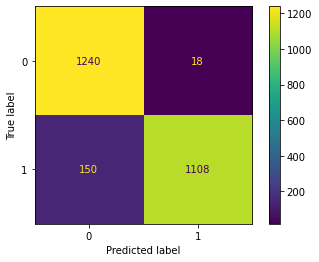

In [74]:
pred_test = rf1_best.predict(X_train_resampled) #Calculate the models prediction of the training data
#Use the function from above to display the corresponding confusion matrix and its metrics
ConfusionMatrixMetrics(y_train_resampled, pred_test) 

Accuracy: 0.8836
Sensitivity: 0.7078
Specificity: 0.8972
Precision: 0.3482
F1 score: 0.4668


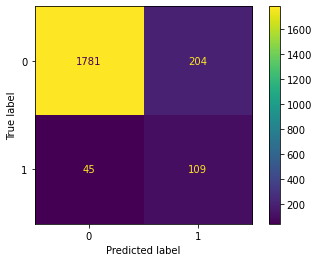

In [75]:
rf1_pred = rf1_best.predict(X_val ) #Calculate the models prediction of the validation data
#Use the function from above to display the corresponding confusion matrix and its metrics
ConfusionMatrixMetrics(y_val, rf1_pred)

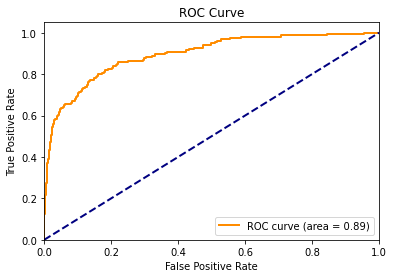

In [76]:
rf1_pred_prob = rf1_best.predict_proba(X_val)  #Calculate the models prediction probabilities of the validation data
PlotRocCurve(y_val,rf1_pred_prob) #Plot the Roc curve using the above function

## 4.5. Description and justification of feature selection (c)
As the previous model was deemed to overfit the training data, it was decided that perhaps not all 25 features were necessary. Removing some of the features was considered. In order to do this the importance of each feaure had to be determined. 

For a random forest model the Gini Index can be used to calculate each features importance. The Gini index is a measure of impurity of a node in a decision tree that ranges from 0 to 1, where 0 indicates that all the observations in the node belong to the same class, and 1 indicates that the observations are split evenly among the two classes. 

The feature importance is then calculated by measuring the total reduction in the Gini index for all of the trees in which a certain feature is used. This involves summing up the reduction in the Gini index for each tree in which the feature is used and then dividing by the total number of trees in the model. The higher the feature importance score, the more important the feature is for making accurate predictions.

The importance for each feature was plotted as shown below. From the plot, it was noted that a significant number of the features have less than a 0.025 importance value. This indicates that many of the features may not be necessary. As there are 25 features it was decided to retain half of these features. This should ensure that the most important features were retained while the unnecessary features were removed. The top 13 features were kept. These are: Line Length, Non Linear Energy, Activity, RMSA,Total Power, Power in band 10-12, Power in band 7-9, Power in band 9-11, Power in band 11-13, Power in band 8-10, Intensity Weighted Mean Frequency,Mobility and Spectral Edge Frequency 90. 

In [77]:
#Make feature importance plotter.
#Takes feature importance values and their names as inputs
def PlotFeatureImportance(feature_importance, feature_names):
    # Sort feature importance values in descending order
    sorted_idx = feature_importance.argsort()

    # Reorder feature names according to sorted feature importance values
    sorted_feature_names = [feature_names[i] for i in sorted_idx]

    # Set color palette using sns library
    colors = sns.color_palette("viridis", len(feature_importance))

    # Create horizontal bar plot of feature importances
    fig, ax = plt.subplots(figsize=(10,8)) #Set size
    ax.barh(range(len(feature_importance)), feature_importance[sorted_idx], color=colors) #Plot horizontal bar plot
    ax.set_yticks(range(len(feature_importance))) #Set y axis numbers
    ax.set_yticklabels(sorted_feature_names) #Label each bar with its feature name
    ax.set_xlabel('Feature Importance') #Add x axis label
    ax.set_ylabel('Feature Name') #Add y axis label
    ax.set_title('Feature Importance') #Add title
    plt.show() #Show the plot

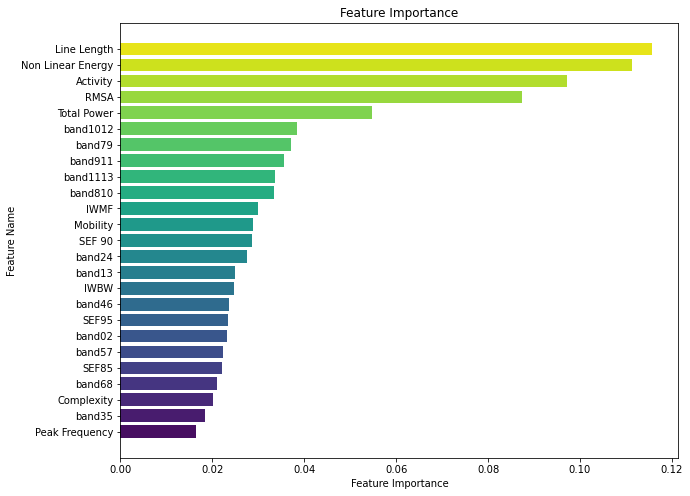

In [78]:
#Find feature importance for the first model using feature_importances_ function
rf1_feature_importance = rf1_best.feature_importances_
# Define feature names
feature_names = ['Line Length', 'RMSA', 'Non Linear Energy', 
                 'Activity', 'Mobility', 'Complexity', 
                 'IWMF', 'IWBW', 'Total Power', 'Peak Frequency',
                 'SEF 90', 'SEF85','SEF95', 
                 'band02', 'band13', 'band24', 'band35', 'band46', 'band57', 'band68',
                 'band79',   'band810', 'band911', 'band1012', 'band1113']
#Plot the feature importance for rf1 using the above function
PlotFeatureImportance(rf1_feature_importance, feature_names)

# 5. Second Model

Then, another random forest model was created, this time just using the 13 most important features. These features were combined into a matrix and split into training and validation data. The training data was then undersampled to ensure there was no imbalance within the dataset. 

In [79]:
#Combine the 13 features with the highest importance into a matrix using the column_stack function
important_features = np.column_stack((LL_Feature, NLE_Feature, Activity_Feature, RMSA_Feature,TP_Feature, band1012_Feature,
                                        band79_Feature, band911_Feature, band1113_Feature, band810_Feature,
                                       FM_Feature, Mobility_Feature, SEF90_Feature))

#Define the names of these features
important_feature_names = ['Line Length', 'Non Linear Energy','Activity', 'RMSA','Total Power', 'band 10-12', 'band 7-9',
                            'band 9-11', 'band 11-13', 'band 8-10','IWMF','Mobility', 'SEF90']

In [80]:
#Use the train_test_split function to split the important feature matrix and labels into train and validation data
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(important_features, CzC3_labels, test_size=0.1, random_state=1) 

In [81]:
#Use the undersample.fit function to undersample the training data
#This ensures half the data has the seizure label and half is non-seizure
X_train_2_resampled, y_train_2_resampled = undersampler.fit_resample(X_train_2, y_train_2)

## 5.1. Model Creation
Similarly to the first model, a grid search with cross validation was used to determine the optimal hyperparameters for the second random forest model.

In [82]:
#Create a grid of parameters to be explored by the cross validation grid search
param_grid = {
    'n_estimators': [50,100,150],  #Try these numbers of trees in the random forest
    'max_depth': range(4,12) #Try forests with a max depth from 4 to 12
}

rf = RandomForestClassifier(random_state=1) #Initialise the random forest classifier with a random state

# Use grid search cross-validation to find the best hyperparameters
#rf means a random forest estimator is used
#cv=5 mean 5 fold corss validation is used
#the scoring is set to roc_auc meaning the area under the roc curve is the permformace metric used
grid_search_2 = GridSearchCV(rf,param_grid, cv=5, scoring="roc_auc")
#Perform the grid search on the resampled data
grid_search_2.fit(X_train_2_resampled, y_train_2_resampled)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search_2.best_params_)
print("Best accuracy: {:.2f}".format(grid_search_2.best_score_))

Best hyperparameters:  {'max_depth': 8, 'n_estimators': 150}
Best accuracy: 0.87


The optimal max depth and number of estimators were found to be 8 and 150 respectively. These hyperparamters were then used to fit a random forest model to the undersampled training data.

In [83]:
# Initialize a new instance of RandomForestClassifier with the best hyperparameters
best_n_estimators = grid_search_2.best_params_['n_estimators'] #Define the optimal number of estimators
best_max_depth = grid_search_2.best_params_['max_depth'] #Define the optimal max depth
rf2_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=1)
#Use these hyperparamters to create a new model

# Fit the model on the training data
rf2_best.fit(X_train_2_resampled, y_train_2_resampled)

RandomForestClassifier(max_depth=8, n_estimators=150, random_state=1)

## 5.2. Performance Analysis
Once again the performance of this model was analysed using confusion matrices and an ROC curve. Confusion matrices were again created for both the training and validation data. In this case the model performs more similarly on the training and test data when compared to the previous model. This indicates that overfitting is less of an issue for this model and it should therefore perform better on unseen data. 

The confusion matrix for the validation data has reasonable accuracy, sensitivity and specificity score of 0.8682, 0.6942 and 0.8816. The precision and F1 scores are much lower with values of 0.3129 and 0.4315. As explained earlier this is largly due to the imbalance in the validation dataset.

The ROC curve looks reasonable with an area of 0.88 under it. This is similar to the previous model.

The feature importance was also plotted for this model. From the plot we can see that all features have an importance over 0.025 unlike the previous model. This indicates that all features are contributing effectively to the output of the model.

Overall this model performs similarly to the previous model despite having 12 less features. This indicates that these features were not necessary. One would also expect this model to perform better in general on new unseen data due to the reduction in overfitting.

Accuracy: 0.8609
Sensitivity: 0.7790
Specificity: 0.9428
Precision: 0.9316
F1 score: 0.8485


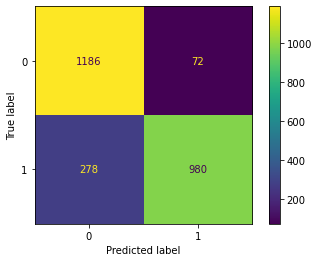

In [84]:
rf2_pred_test = rf2_best.predict(X_train_2_resampled) #Calculate the models prediction of the training data
#Use the function created to display the corresponding confusion matrix and its metrics
ConfusionMatrixMetrics(y_train_2_resampled,rf2_pred_test)

Accuracy: 0.8682
Sensitivity: 0.6948
Specificity: 0.8816
Precision: 0.3129
F1 score: 0.4315


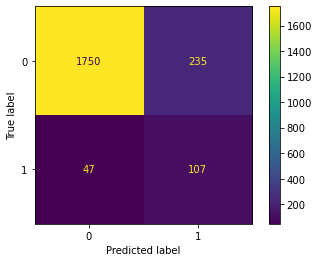

In [85]:
rf2_pred = rf2_best.predict(X_val_2 )  #Calculate the models prediction of the validation data
#Use the function created to display the corresponding confusion matrix and its metrics
ConfusionMatrixMetrics(y_val_2, rf2_pred)

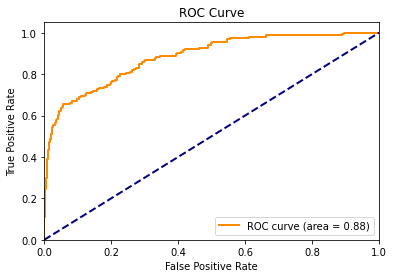

In [86]:
rf2_pred_prob = rf2_best.predict_proba(X_val_2) #Calculate the models prediction probabilities of the validation data
PlotRocCurve(y_val_2,rf2_pred_prob) #Plot the Roc curve using the above function

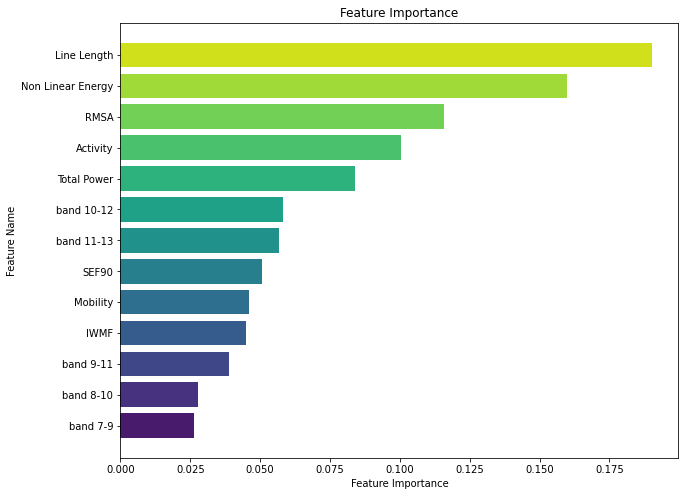

In [87]:
#Find feature importance for the second model using feature_importances_ function
rf2_feature_importance = rf2_best.feature_importances_
#Plot the feature importance for rf2 using the function created
PlotFeatureImportance(rf2_feature_importance, important_feature_names)

# 6 Test Data

## 6.1. Load in Test Data
Next the test data and annotations were loaded in. The number of epochs in the test data was calculated and the annotation value at each of the epochs times were found. 

In [88]:
#Load in the unseen test data and corresponding labels using the pd.read_csv function
test_data =   pd.read_csv('Test-EEG75_Cz-C3_Processed.csv')
test_labels = pd.read_csv('Test-Annotation_Cz-C3-EEG75.csv')

In [89]:
#Find the number of epochs in the test data using the formula below
numberofEpochs_2 = (len(test_data)-NEpoch)//(NEpoch-Noverlap) + 1 # Use integer divison // to get exact number of epochs
numberofEpochs_2 #Display the number of epochs in the test data

983

In [90]:
#Define the featuretime for the test data using the same formula from above.
#This is the times at which each of the epochs occur in the test data in seconds
featuretime_2= np.arange(1,numberofEpochs_2+1,1)*4

#Find the seizure labels at each of these feature times. 
#The loc function is used to extract just the Cz-C3 channel column from the test data.
#Just take the values at the featuretime indexes so it matches with the defined epoch times using [featuretime_2]
#Convert this to a numpy array using the to_numpy function
y_test = test_labels["Cz-C3"].to_numpy()[featuretime_2]

Then, each feature array was calculated for the test data using the function from above.

In [91]:
epochstart=0 #Set epochstart to 0

#Define empty arrays for each of the features
LL_Feature_test= NLE_Feature_test=Activity_Feature_test = RMSA_Feature_test= TP_Feature_test=BW_Feature_test= SEF90_Feature_test= SEF85_Feature_test =SEF95_Feature_test =Mobility_Feature_test=FM_Feature_test=PF_Feature_test=Complexity_Feature_test = np.array([])
band02_Feature_test=band13_Feature_test=band24_Feature_test =band35_Feature_test =band46_Feature_test =band57_Feature_test =band68_Feature_test =band79_Feature_test =band810_Feature_test =band911_Feature_test =band1012_Feature_test =band1113_Feature_test = np.array([])

for i in range(numberofEpochs_2): #Iterate through a for loop for each epoch of the test data
    #Find the eeg test values in the Cz-C3 channel in the current epoch using loc. Convert this to a numpy array using to_numpy
    Epoch= test_data.loc[epochstart:epochstart+NEpoch-1,"Cz-C3"].to_numpy()
    epochstart += Noverlap #Add Noverlap (128) to the epochstart value
    
    #Find each feature value for the current epoch using the feature calculation function from above.
    #Append these values to their corresponding feature array using the append function.
    #This is done for all epochs in the test data for all features defined.
    LL_Feature_test=np.append(LL_Feature_test,LLcalculation(NEpoch, Epoch))
    NLE_Feature_test=np.append(NLE_Feature_test,NLEcalculation(NEpoch, Epoch))
    Activity_Feature_test = np.append(Activity_Feature_test,Activitycalculation(NEpoch, Epoch))
    RMSA_Feature_test = np.append(RMSA_Feature_test,RMSAcalculation(NEpoch, Epoch))
    PSD_test = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    TP_Feature_test = np.append(TP_Feature_test,tpcalculation(PSD_test,NEpoch))
    SEF90_Feature_test = np.append(SEF90_Feature_test, SEF90calculation(PSD_test, 32, NEpoch))
    SEF85_Feature_test = np.append(SEF85_Feature_test, SEF85calculation(PSD_test, 32, NEpoch))
    SEF95_Feature_test = np.append(SEF95_Feature_test, SEF95calculation(PSD_test, 32, NEpoch))

    BW_Feature_test = np.append(BW_Feature_test,bwcalculation(PSD_test, 32, NEpoch))
    Mobility_Feature_test = np.append(Mobility_Feature_test, Mobilitycalculation(NEpoch, Epoch))
    FM_Feature_test = np.append(FM_Feature_test,fmcalculation(PSD_test, 32, NEpoch))
    PF_Feature_test=np.append(PF_Feature_test,pfcalculation(PSD_test, 32, NEpoch))
    Complexity_Feature_test=np.append(Complexity_Feature_test, Complexitycalculation(NEpoch, Epoch))
    
    band02_Feature_test=np.append(band02_Feature_test,bandpowercalculation(PSD_test, 32, ([0,2])))
    band13_Feature_test=np.append(band13_Feature_test,bandpowercalculation(PSD_test, 32, ([1,3])))
    band24_Feature_test=np.append(band24_Feature_test,bandpowercalculation(PSD_test, 32, ([2,4])))
    band35_Feature_test=np.append(band35_Feature_test,bandpowercalculation(PSD_test, 32, ([3,5])))
    band46_Feature_test=np.append(band46_Feature_test,bandpowercalculation(PSD_test, 32, ([4,6])))
    band57_Feature_test=np.append(band57_Feature_test,bandpowercalculation(PSD_test, 32, ([5,7])))
    band68_Feature_test=np.append(band68_Feature_test,bandpowercalculation(PSD_test, 32, ([6,8])))
    band79_Feature_test=np.append(band79_Feature_test,bandpowercalculation(PSD_test, 32, ([7,9])))
    band810_Feature_test=np.append(band810_Feature_test,bandpowercalculation(PSD_test, 32, ([8,10])))
    band911_Feature_test=np.append(band911_Feature_test,bandpowercalculation(PSD_test, 32, ([9,11])))
    band1012_Feature_test=np.append(band1012_Feature_test,bandpowercalculation(PSD_test, 32, ([10,12])))
    band1113_Feature_test=np.append(band1113_Feature_test,bandpowercalculation(PSD_test, 32, ([11,13])))
    

The arrays containing the 13 features in the final model were combined into a matrix. This would be used to evaluate the models performance.

In [92]:
#Create a matrix containing the test feature arrays of the 13 most important features (used to create the second model)
#This is done using the column_stack function
important_test_features = np.column_stack((LL_Feature_test, NLE_Feature_test, Activity_Feature_test, RMSA_Feature_test,
                                           TP_Feature_test, band1012_Feature_test, band79_Feature_test, band911_Feature_test, 
                                           band1113_Feature_test, band810_Feature_test,FM_Feature_test, 
                                           Mobility_Feature_test, SEF90_Feature_test))

## 6.2. Analysis of performance of the classifier on the test data (g)

The classifier's performance on the test data can be analyzed using the following metrics: 
* **Accuracy:** The classifier correctly classified 83.11% of the test samples, which is a decent performance. This is the overall correctness of the model's predictions. This may be misleading due to the imbalanced test data as it doesn't tell us much about how well the model performs for seizure cases specifically.
* **Sensitivity:** The classifier correctly identified 76.36% of the positive cases, which means that it missed approximately 24% of the positive cases. While this is a decent value, it may not be sufficient for a seizure classification model where detecting all seizure cases is critical.
* **Specificity:** The classifier correctly identified 83.51% of the negative cases, which means that it misclassified approximately 16.5% of the negative cases. This is a good value but it also doesn't tell us much about how well the model performs for seizure cases specifically.
* **Precision:** The classifier correctly identified 21.54% of the positive predictions. This is a low value and indicates that the model has a high rate of false positives, which could cause problems in a seizure classification model. This low value could be due to imbalance in the test data.
* **F1 score:** The F1 score was 0.3360, which is quite low. This is mainly due to the low precision value. The score indicates that the model's performance is not optimal, but still provides some balance between precision and sensitivity.
* **Area under ROC (AUC):** The area under the ROC was 0.88 which indicates that the classifier is performing reasonably well at discriminating between positive and negative cases.

Accuracy: 0.8311
Sensitivity: 0.7636
Specificity: 0.8351
Precision: 0.2154
F1 score: 0.3360


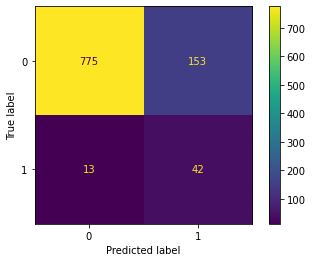

In [93]:
rf2_pred_test = rf2_best.predict(important_test_features)  #Calculate the second models prediction of the test data
#Use the function from above the display the confusion matrix and its metrics for the test predictions and test labels.
ConfusionMatrixMetrics(y_test, rf2_pred_test)

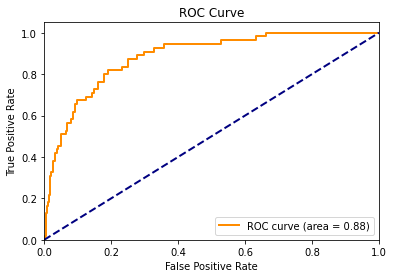

In [94]:
#Calculate the models prediction probabilities of the test data
rf2_pred_prob_test = rf2_best.predict_proba(important_test_features)  
#Plot the Roc curve for the predicted probabilities of the test data using the above function
PlotRocCurve(y_test,rf2_pred_prob_test) 

## 6.3. Discussion (g)

While this model performs at a decent level, it would not be sufficient for real world scenarios where incorrect classification of seizures could have significant consequences. For example, a high number of false positives produced by the model could lead to unnecessary interventions or medical treatments for patients while a low sensitivity means that many patients would often be incorrectly classified as healthy. In real-world scenarios much more complex models would be used such as multi channel models or neural networks. Also much more data would be available in these scenarios this would allow a more complex model to be created without overfitting being an issue.

An example of a multi channel model was in Temko et al (2011). In this paper SVM models were created for 8 eeg channels. These models were combined into an ensemble which could accurately classify seizures. This model had an 89% detection rate with only one false seizure detection per hour of data. This is a significant improvement on this random forest model. 

Liu et al (2019) also created a seizure detection model using a deep Convolutional Neural Network. This type of model requires significant computing power and a large dataset. The model created had a sensitivity of over 97% and a specificity of over 98%. This is a massive improvement on this report's model. 

# 7.Conclusion (h)
In conclusion, a single channel Random Forest model was created to classify seizures using a set of features extracted from EEG signals. The data was undersampled to avoid bias. The initial model was trained with 25 features, and then narrowed down to 13 most important features based on a Gini Index feature selection method. Gridsearch was used to find the optimal hyperparameters for this model. The model was then evaluated on the unseen test data. 

The final model performed reasably well on the test data with the following metric values: 
* **Accuracy:** 0.8311
* **Sensitivity:** 0.7636
* **Specificity:** 0.8351
* **Precision:** 0.2154
* **F1 score:** 0.3360
* **Area under ROC:** 0.88

These metrics suggest that the models performance is moderately successful. Relatively high accuracy, sensitivity, specificity and area under ROC suggest the model is good at distinguishing between seizure and non-seizure cases. The low precision is mainly to a high number of false positives in the model. This is largely due to the fact that the testing data is imbalanced. This low precision score also affected the F1 score, which is a function of both precision and sensitivity.

Some possible improvements could be made with an increased data set. While the dataset provided seemed quite large, undersampling significantly reduced the size of the training data. Incorperating all 8 eeg channels in an ensemble model could also potentially improve the models performance. This would allow the model to capture relationships in other channels that may not be present in the Cz-C3 channel. 

In summary, the single channel, neonatal seizure detection model performs well considering its simplicity. However, there is still room for improvement, and the suggested solutions may lead to a more refined model.

# 8. References
* Temko, A., Thomas, E., Marnane, W., Lightbody, G., & Boylan, G. (2011). EEG-based neonatal seizure detection with support vector machines. Clinical Neurophysiology, 122(3), 464-473.
* De Weerd, A. W., Despland, P. A., & Plouin, P. (1999). Neonatal EEG. The international federation of clinical neurophysiology. Electroencephalography and clinical neurophysiology. Supplement, 52, 149-157.
* [Volpi, G. F. (2019, August 23). Class imbalance: A classification headache. Medium. Retrieved May 5, 2023](https://towardsdatascience.com/class-imbalance-a-classification-headache-1939297ff4a4#:~:text=Why%20is%20this%20a%20problem,classification%20of%20the%20minority%20class.)
* [Yiu, Tony. "Understanding random forest-towards data science." Understanding Random Forest How the Algorithm Works and Why it Is So Effective (2019).](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)
* [Kho, J. (2018). Why random forest is my favorite machine learning model. Towards Data Science, Oct, 20.](https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706)
* Liu, G., Zhou, W., & Geng, M. (2020). Automatic seizure detection based on S-transform and deep convolutional neural network. International journal of neural systems, 30(04), 1950024.